In [ ]:
# %%

from gad_adversarial_robustness.gad.OddBall_vs_DOMININANT import get_OddBall_AS
from gad_adversarial_robustness.poison.greedy import greedy_attack_inserted_edge_statistics, multiple_AS
#Insert Dataset
from pygod.generator import gen_contextual_outlier, gen_structural_outlier
from torch_geometric.datasets import AttributedGraphDataset
from torch_geometric.datasets import Planetoid
from typing import List
import copy
import yaml
import os
import torch
import numpy as np
from torch_geometric.datasets import AttributedGraphDataset, Planetoid
import math
from pygod.generator import gen_contextual_outlier, gen_structural_outlier
import torch_geometric.transforms as T
from gad_adversarial_robustness.utils.graph_utils import load_injected_dataset, get_anomaly_indexes
from gad_adversarial_robustness.utils.graph_utils import prepare_graph, adj_matrix_sparse_coo_to_dense
from pygod.utils import load_data



torch.manual_seed(123)
TOP_K = 6

#data, prior_labels = load_injected_dataset("Facebook")
data = load_data("inj_cora") 
label = torch.Tensor(data.y.bool()).to('cuda')
labels_np = label.cpu().detach().numpy()
y_binary: List[int] = data.y.bool()
anomaly_list = np.where(y_binary == True)[0]  # Used for list for which nodes to hide
amount_of_nodes = data.num_nodes


target_list_as = get_OddBall_AS(data=data, device='cuda')
target_list_as = np.array(target_list_as)
target_list = get_anomaly_indexes(target_list_as, labels_np, TOP_K, method='top', print_scores=True, random_top=True)
print(target_list)

tensor([1., 1., 1.,  ..., 1., 1., 1.])
node_attrs
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
adj
SparseTensor(row=tensor([   0,    0,    0,  ..., 2707, 2707, 2707]),
             col=tensor([ 633, 1862, 2582,  ...,  598, 1473, 2706]),
             val=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
             size=(2708, 2708), nnz=10783, density=0.15%)
labels
tensor([0, 0, 0,  ..., 0, 0, 0])


c:\users\andwh\documents\p6\aau-dat6-poison-gad\gad_adversarial_robustness\gad\OddBall_vs_DOMININANT.py:98: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:55.)
  return torch.sparse.mm(torch.sparse.mm(A_sp, A_sp), A_sp).to_dense()
c:\users\andwh\documents\p6\aau-dat6-poison-gad\gad_adversarial_robustness\gad\OddBall_vs_DOMININANT.py:102: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src

Anomaly scores for top K indices with label = 1:
Index: 214 | Anomaly Score: 10.430201011418838
Index: 2479 | Anomaly Score: 6.890049782985513
Index: 170 | Anomaly Score: 8.80850968458521
Index: 980 | Anomaly Score: 10.064817213056571
Index: 1901 | Anomaly Score: 5.759697197459701
Index: 459 | Anomaly Score: 10.332852221272345
[ 214 2479  170  980 1901  459]


In [ ]:
# %%

def convertToTriple(data):
    _, adj, _ = prepare_graph(data) #Get adjacency matrix

    n = data.num_nodes

    # 'triple' is a list that will store the perturbed triples during the poisoning process.
    # Each triple represents an edge modification in the form of (node1, node2, edge_label).

    dense_adj = adj.to_dense()
    
    A = np.array(dense_adj)

    triple = []
    for i in range(n):
        for j in range(i+1,n):
        #for j in range(n)
            triple.append([i,j,A[i,j]])
    triple = np.array(triple)

    return triple


triple = convertToTriple(data)

B = 100


model = multiple_AS(target_lst = target_list, n_node = amount_of_nodes, device = 'cuda')



_, _, edge_AS_prior, edge_AS_post, pos_prior, pos_post, perturb = greedy_attack_inserted_edge_statistics(model, triple, target_list, B, CPI = 1, print_stats = True)

tensor([1., 1., 1.,  ..., 1., 1., 1.])
node_attrs
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
adj
SparseTensor(row=tensor([   0,    0,    0,  ..., 2707, 2707, 2707]),
             col=tensor([ 633, 1862, 2582,  ...,  598, 1473, 2706]),
             val=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
             size=(2708, 2708), nnz=10783, density=0.15%)
labels
tensor([0, 0, 0,  ..., 0, 0, 0])
initial anomaly score: 52.28612711077818
iter 1 anomaly score: 48.71123772087168 perturb: [980, 1901, 1]
iter 2 anomaly score: 44.119463687130434 perturb: [170, 2600, 1]
iter 3 anomaly score: 41.625889960095115 perturb: [459, 1623, 1]
iter 4 anomaly score: 38.160678525360545 perturb: [214, 1206, 1]
iter 5 anomaly score: 35.64812933301808 perturb: [170, 214, 1]
iter 6 anomaly score: 34.397044846991605 perturb: [143, 1014, 1]
iter 7 anomaly score: 33.117570160677666 perturb: [938, 980, 1]
iter 

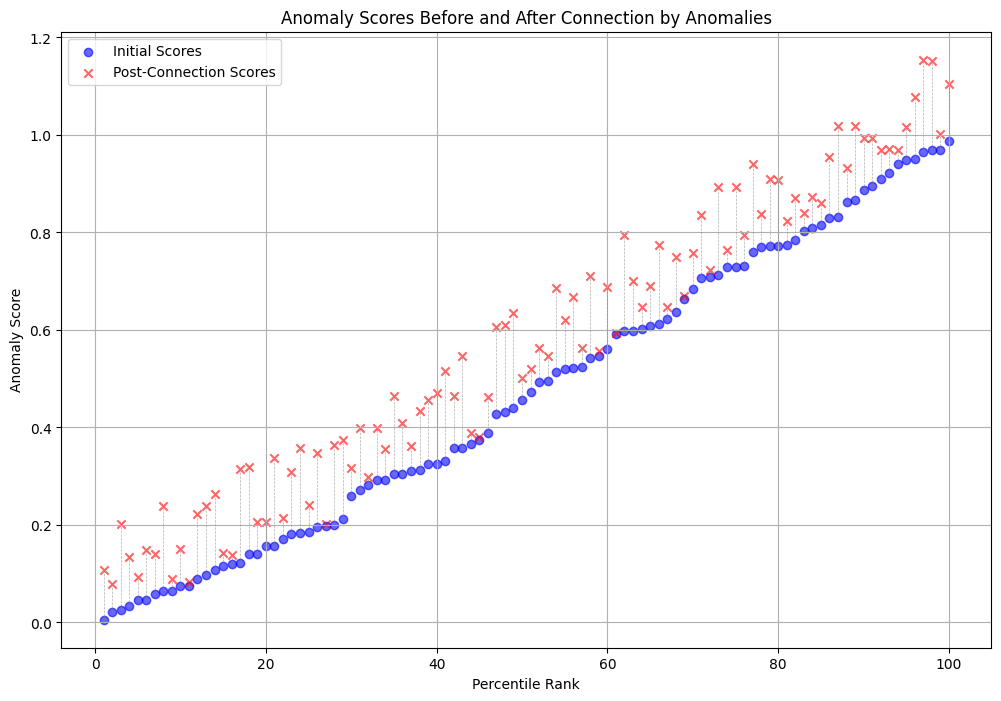

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
initial_anomaly_scores = np.random.rand(100)  # Replace with your data
post_connection_anomaly_scores = initial_anomaly_scores + np.random.rand(100) * 0.2  # Replace with your data

# Calculate percentiles
percentiles = [percentileofscore(initial_anomaly_scores, score) for score in initial_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as.cpu().detach().numpy()  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu()) for score in initial_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores.cpu().detach().numpy(),
    'post_connection_score': post_connection_anomaly_scores.cpu().detach().numpy(),
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

AttributeError: 'list' object has no attribute 'cpu'

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

for element in initial_anomaly_scores:
    element.cpu().detach().numpy()

for element in post_connection_anomaly_scores:
    element.cpu().detach().numpy()
# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

for element in initial_anomaly_scores:
    element.cpu().detach().numpy()

for element in post_connection_anomaly_scores:
    element.cpu().detach().numpy()
# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scoresc.cpu().detach().numpy(),
    'post_connection_score': post_connection_anomaly_scores.cpu().detach().numpy(),
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

NameError: name 'initial_anomaly_scoresc' is not defined

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

for element in initial_anomaly_scores:
    element.cpu().detach().numpy()

for element in post_connection_anomaly_scores:
    element.cpu().detach().numpy()
# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores.cpu().detach().numpy(),
    'post_connection_score': post_connection_anomaly_scores.cpu().detach().numpy(),
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

AttributeError: 'list' object has no attribute 'cpu'

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [np.array(tensor) for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [np.array(tensor) for tensor in post_connection_anomaly_scores]


# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

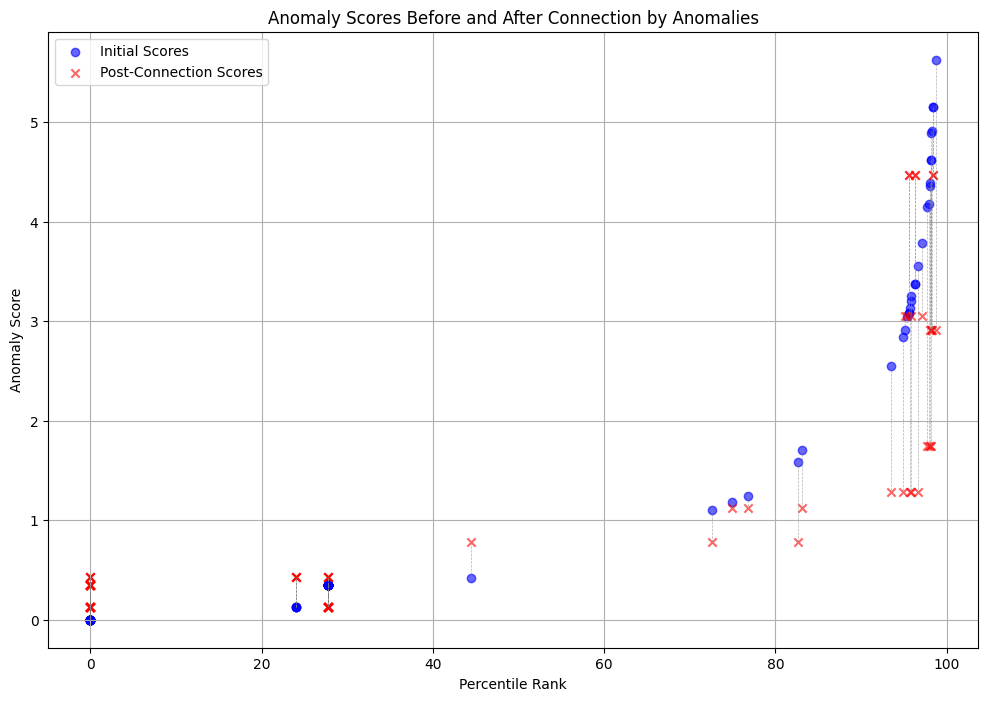

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]


# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
initial_anomaly_scores


[array([3.55467711]),
 array([4.89160692]),
 array([3.25240655]),
 array([5.62655394]),
 array([4.35992707]),
 array([4.91465102]),
 array([3.1302855]),
 array([3.78327871]),
 array([2.84217354]),
 array([1.58055913]),
 array([2.55043701]),
 array([1.71012083]),
 array([4.14394931]),
 array([3.20380388]),
 array([4.61710158]),
 array([3.04278485]),
 array([1.10517889]),
 array([4.62186688]),
 array([4.17571246]),
 array([1.23849695]),
 array([4.38422254]),
 array([1.18502029]),
 array([5.15067296]),
 array([5.15233307]),
 array([0.00050603]),
 array([0.00043074]),
 array([0.00035536]),
 array([0.00027981]),
 array([0.00020403]),
 array([3.37346013]),
 array([3.37375046]),
 array([0.00025877]),
 array([0.00033886]),
 array([0.00041723]),
 array([0.00049436]),
 array([3.07906151]),
 array([3.07803254]),
 array([0.00108458]),
 array([0.00117265]),
 array([0.00125774]),
 array([0.00134056]),
 array([0.00142169]),
 array([0.00150156]),
 array([0.00158052]),
 array([0.00165886]),
 array([0.0

In [ ]:
anomaly_scores

array([0.10501582, 0.82758821, 1.77356597, ..., 0.82758821, 1.11896379,
       2.40842166])

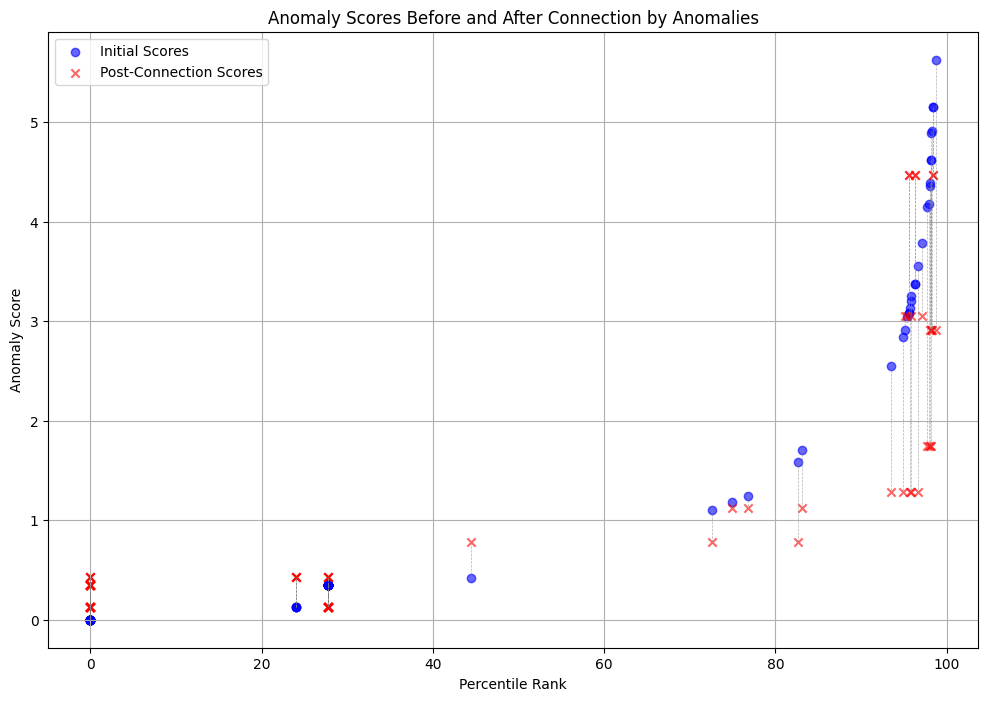

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
initial_anomaly_scores

[3.5546771120889042,
 4.891606917411909,
 3.2524065533925723,
 5.6265539350925975,
 4.359927070979062,
 4.914651022993068,
 3.1302854969631113,
 3.7832787127226855,
 2.8421735403866966,
 1.5805591330691133,
 2.5504370105787464,
 1.7101208349790777,
 4.14394930521833,
 3.2038038765676697,
 4.617101578044998,
 3.0427848490260048,
 1.1051788864572663,
 4.621866878032513,
 4.175712457200991,
 1.2384969474901895,
 4.384222544208447,
 1.1850202873607092,
 5.15067296191313,
 5.152333067673652,
 0.0005060327554333961,
 0.0004307446968146855,
 0.0003553643379318431,
 0.00027981267739589203,
 0.00020402540597224674,
 3.3734601254297756,
 3.3737504565201566,
 0.0002587693571517117,
 0.00033885924085851857,
 0.0004172253574680181,
 0.0004943576823083541,
 3.079061508778182,
 3.078032539098313,
 0.0010845775186120832,
 0.0011726496469967986,
 0.0012577367703054268,
 0.0013405622124221586,
 0.0014216890099972767,
 0.001501559449362413,
 0.0015805236850428242,
 0.0016588607767525727,
 0.0017367943679

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
initial_anomaly_scores = [score for score in initial_anomaly_scores if score > 3]
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]
post_connection_anomaly_scores = [score for score in post_connection_anomaly_scores if score > 3]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

ValueError: All arrays must be of the same length

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score[0] <= 3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

IndexError: invalid index to scalar variable.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score <= 3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

ValueError: All arrays must be of the same length

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score <= 3:
        print(len(post_connection_anomaly_scores))
        del initial_anomaly_scores[i]
        print(len(initial_anomaly_scores))
        print(len(post_connection_anomaly_scores))
        del post_connection_anomaly_scores[i]
        print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

90
89
90
89
89
88
89
88
88
87
88
87
87
86
87
86
86
85
86
85
85
84
85
84
84
83
84
83
83
82
83
82
82
81
82
81
81
80
81
80
80
79
80
79
79
78
79
78
78
77
78
77
77
76
77
76
76
75
76
75
75
74
75
74
74
73
74
73
73
72
73
72
72
71
72
71
71
70
71
70
70
69
70
69
69
68
69
68
68
67
68
67
67
66
67
66
66
65
66
65
65
64
65
64
64
63
64
63
63
62
63
62
62
61
62
61
61
60
61
60
60
59
60
59
59
58
59
58
58
57
58
57
57
56
57
56
56
55
56
55
55
54
55
54
54
53
54
53


ValueError: All arrays must be of the same length

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score <= 3:
        print(len(post_connection_anomaly_scores))
        del initial_anomaly_scores[i]
        print(len(initial_anomaly_scores))
        print(len(post_connection_anomaly_scores))
        del post_connection_anomaly_scores[i]
        print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

ValueError: All arrays must be of the same length

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score <= 3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

ValueError: All arrays must be of the same length

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score[0] <= 3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

IndexError: invalid index to scalar variable.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score <= 3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score.cpu().detach().numpy()) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

AttributeError: 'numpy.float64' object has no attribute 'cpu'

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

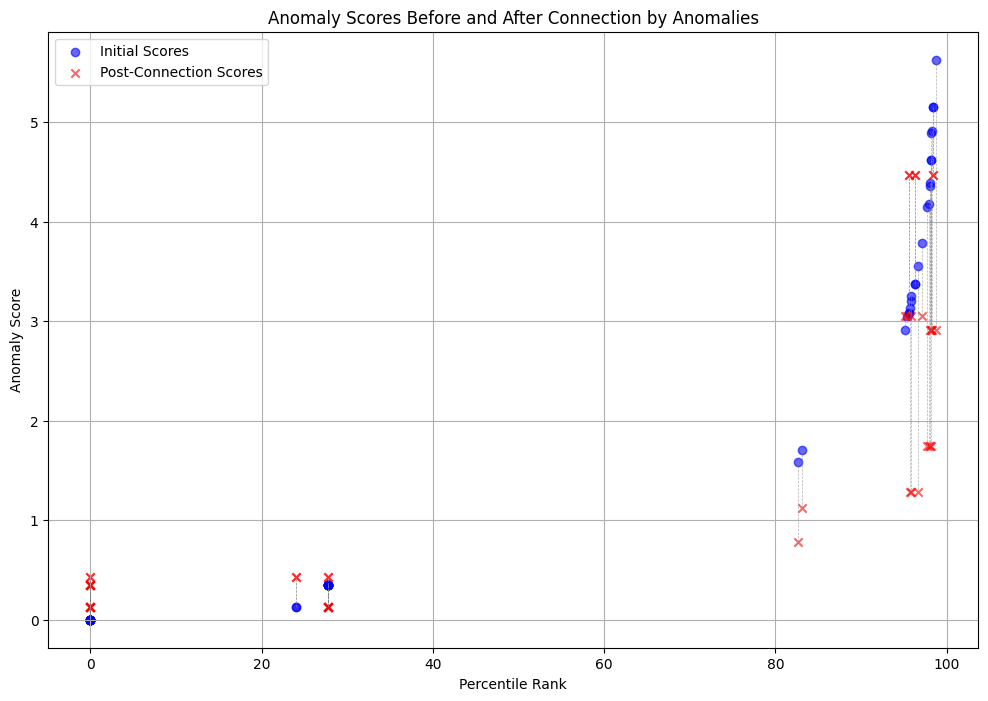

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score <= 3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

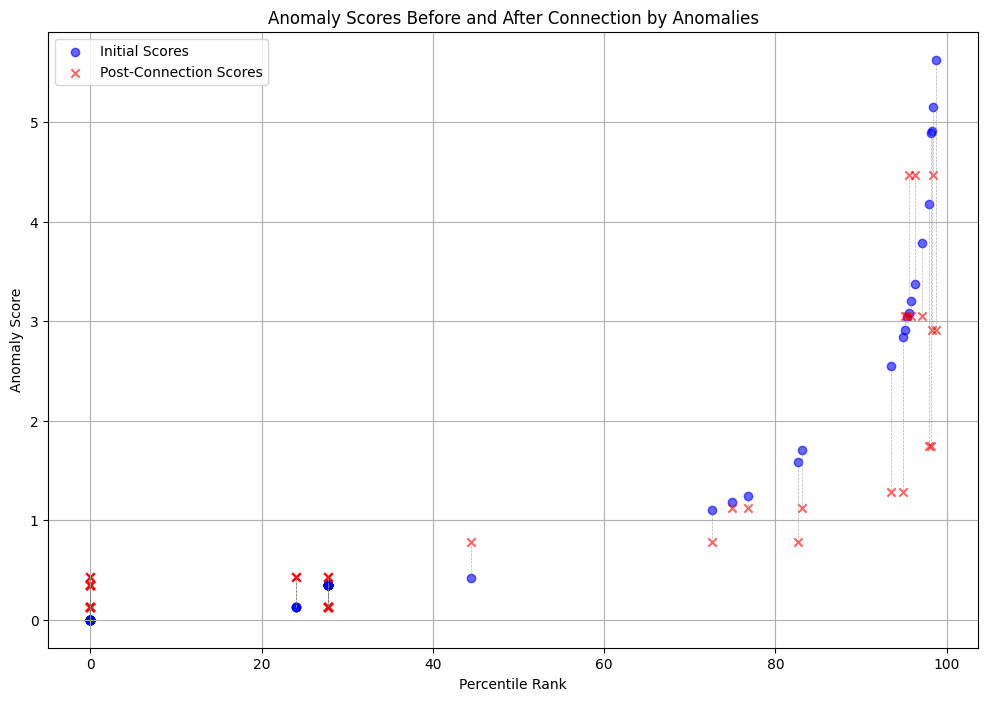

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score >= 3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

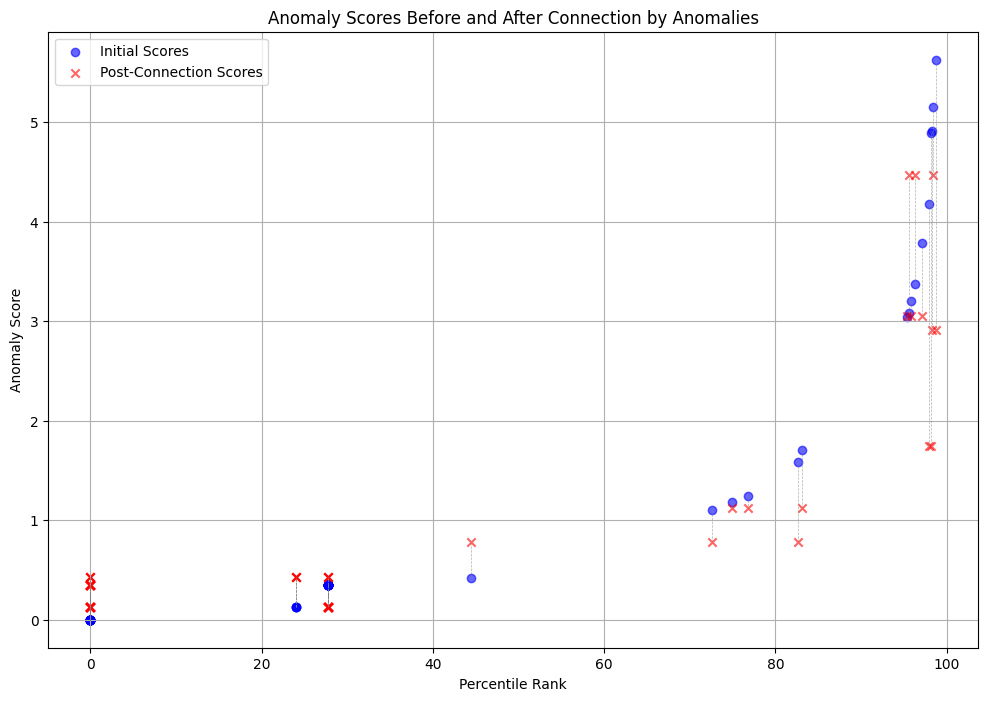

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score >= 2:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

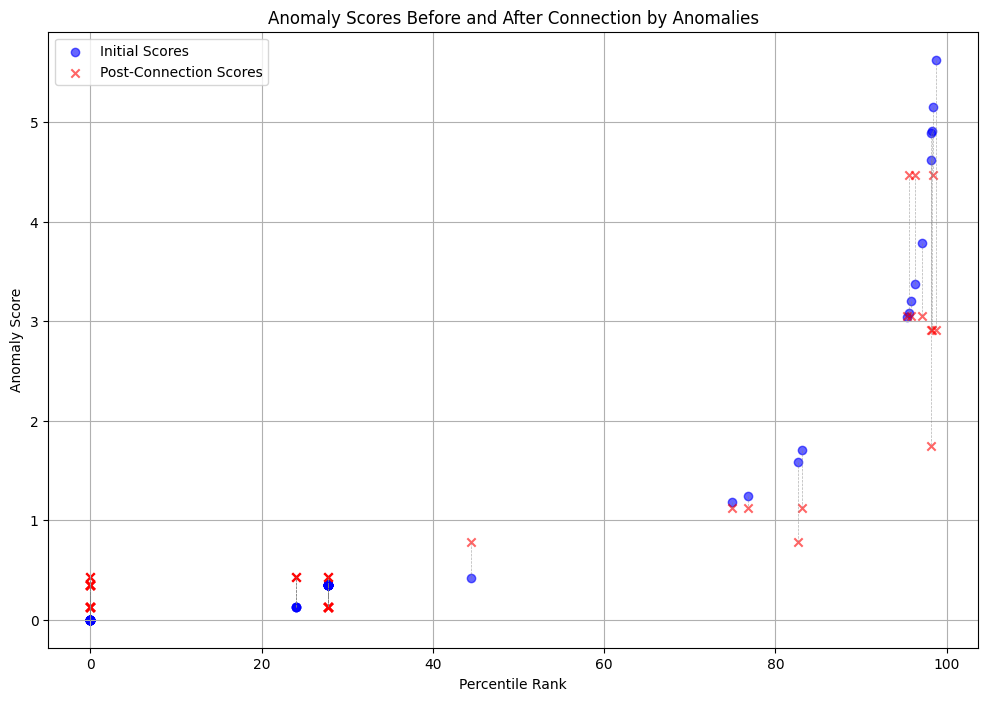

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(initial_anomaly_scores):
    if score >= 1:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

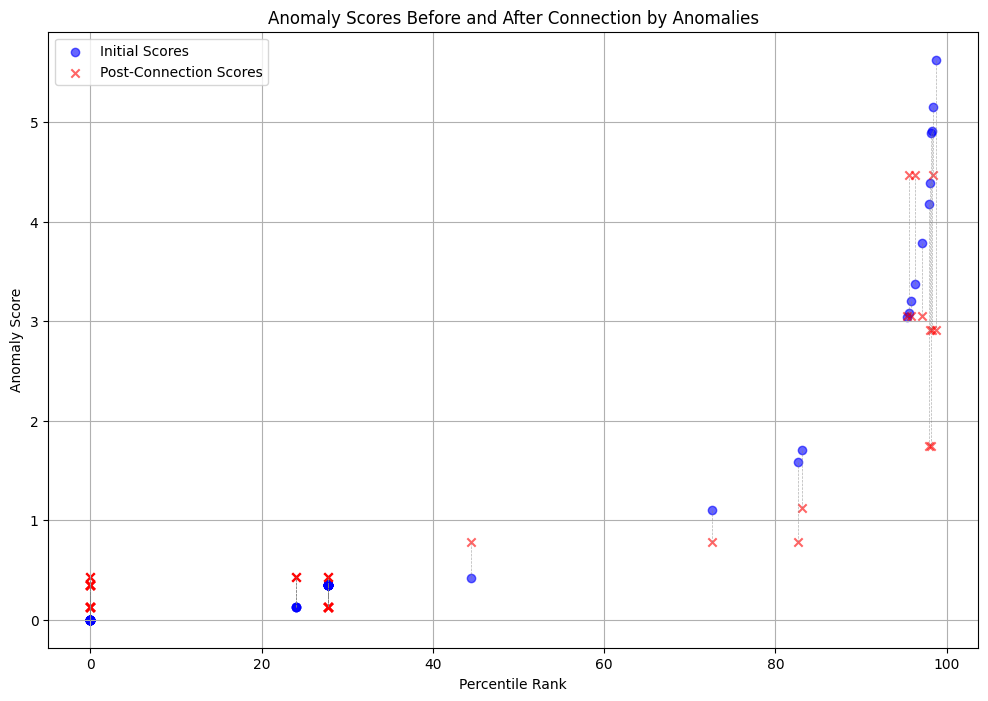

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 1:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

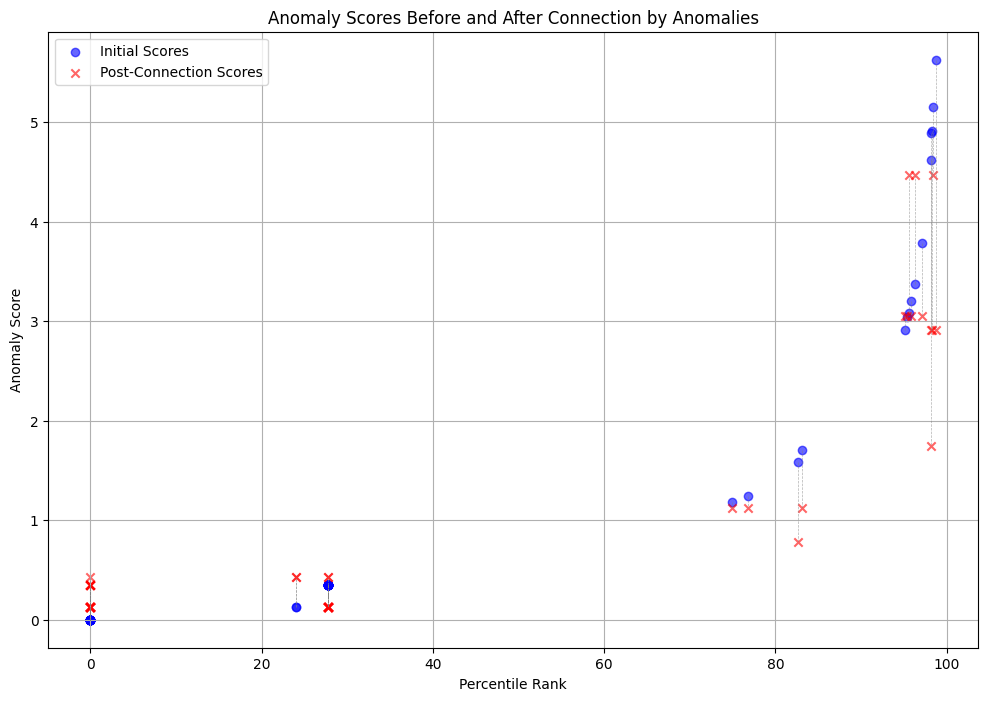

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 0.3:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

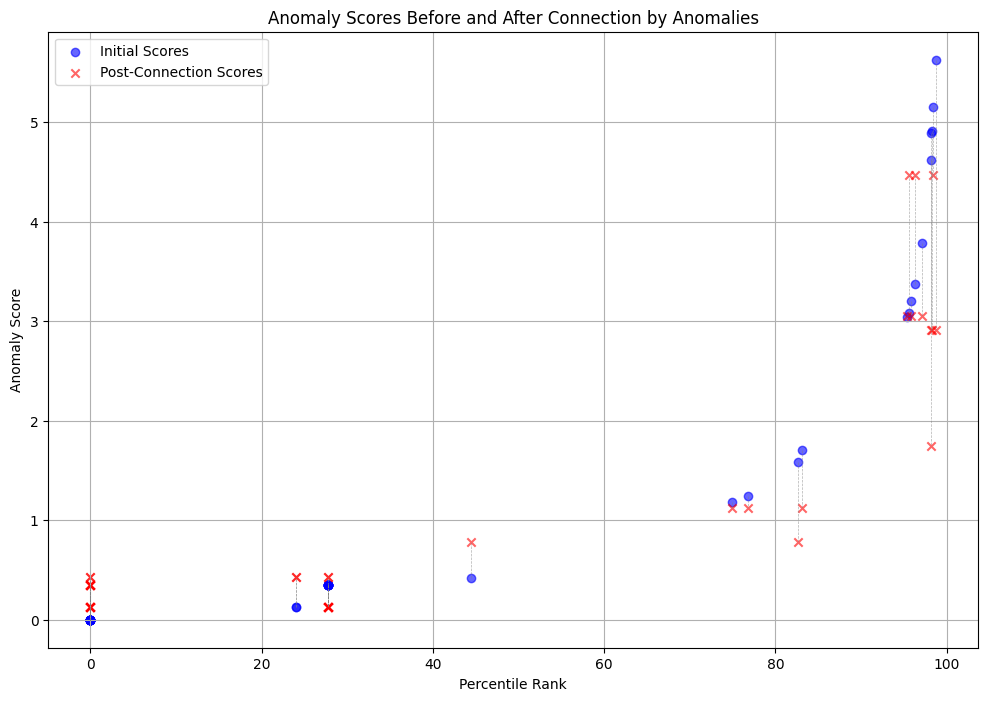

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 0.01:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

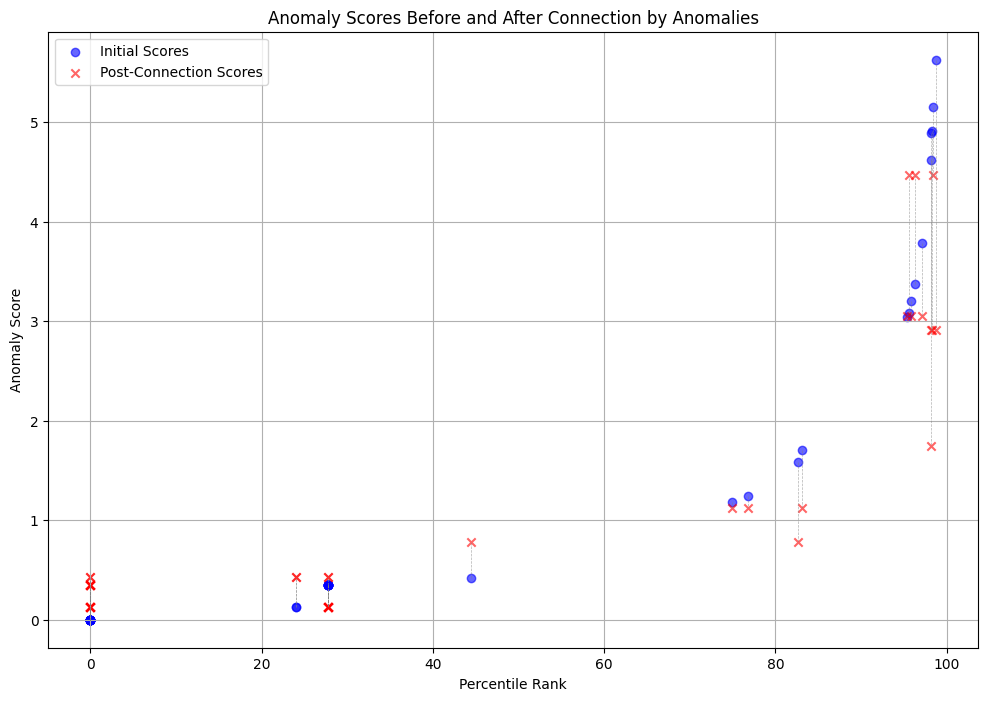

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

print("PRIOR")
print(len(initial_anomaly_scores))
for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 0.01:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

print("POST")
print(len(initial_anomaly_scores))

percentiles = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

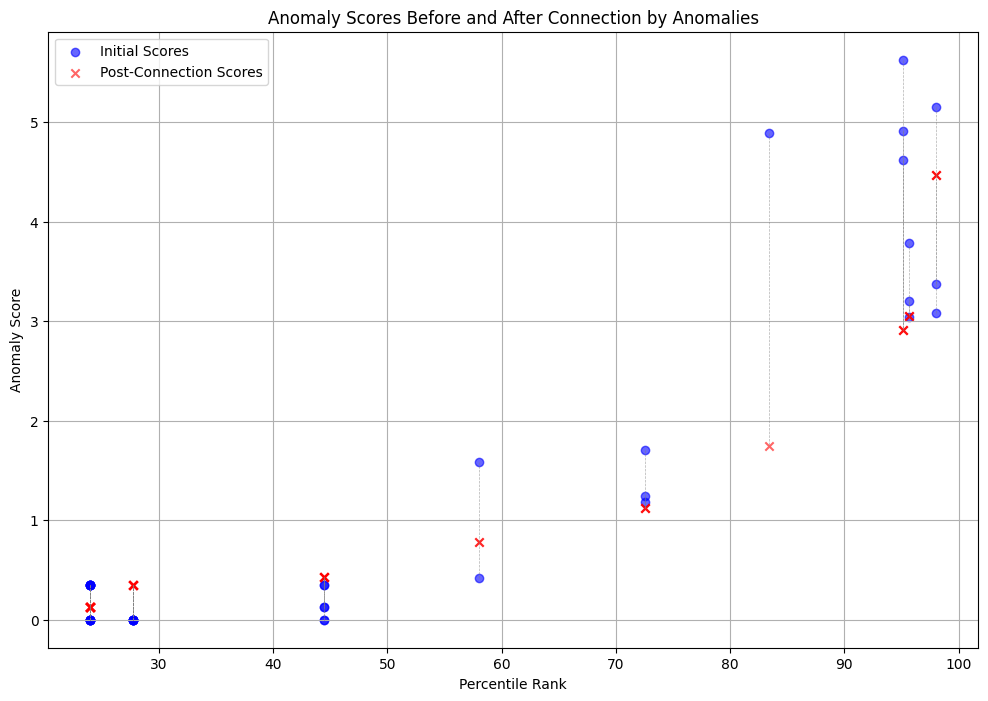

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

print("PRIOR")
print(len(initial_anomaly_scores))
for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 0.01:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

print("POST")
print(len(initial_anomaly_scores))

percentiles = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

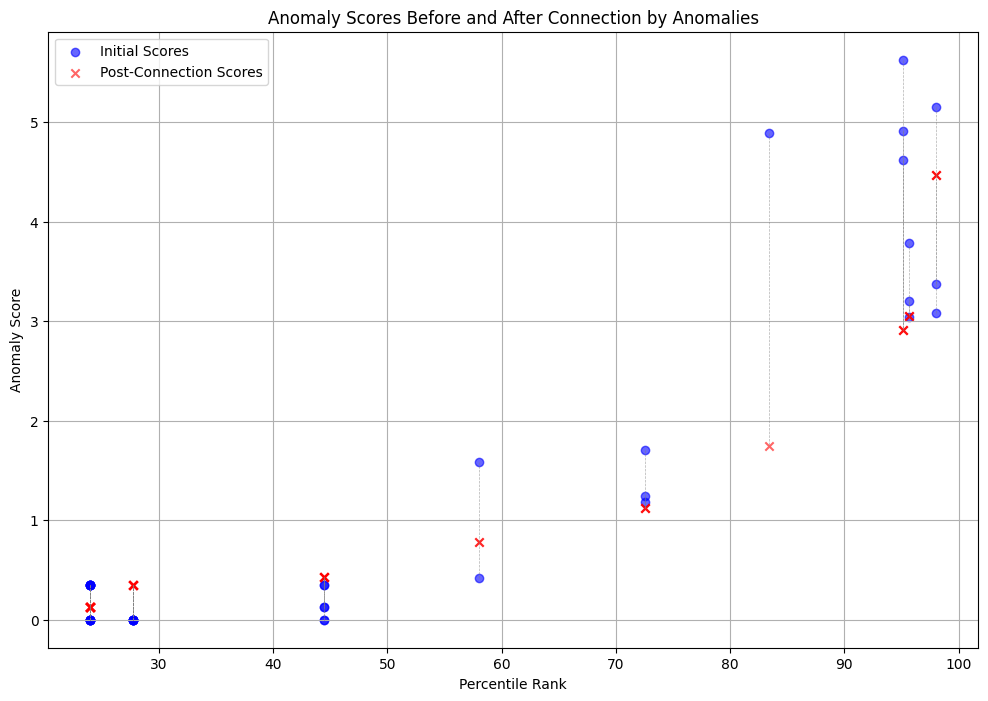

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

print("PRIOR")
print(len(post_connection_anomaly_scores))
for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 0.01:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

print("POST")
print(len(post_connection_anomaly_scores))

percentiles = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

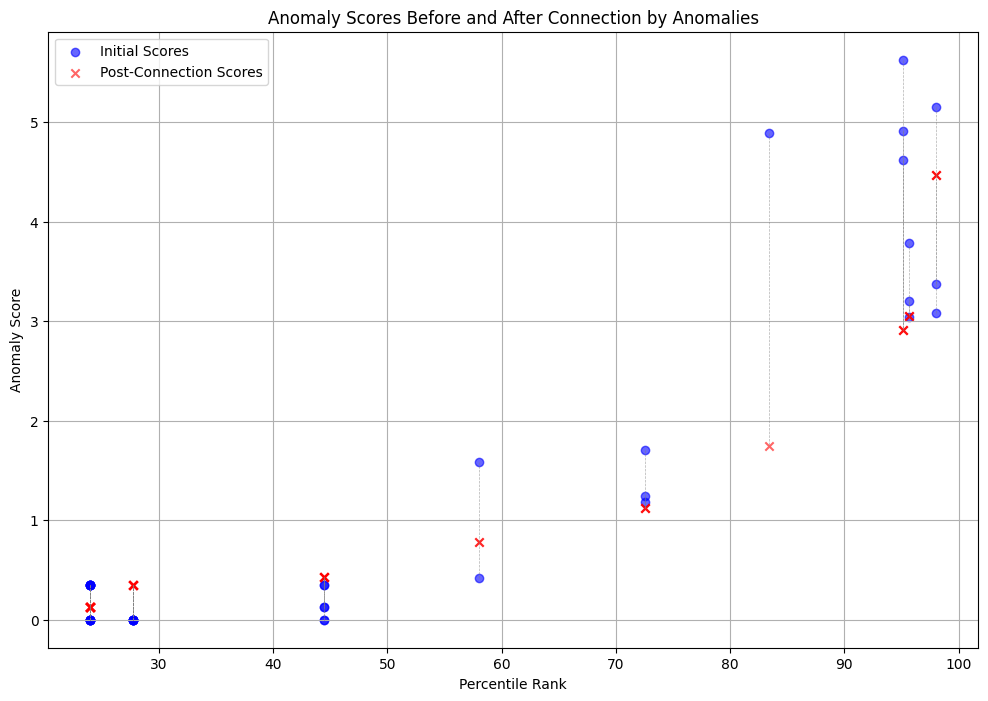

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

print("PRIOR")
print(len(post_connection_anomaly_scores))
for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 0.01:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

print("POST")
print(len(post_connection_anomaly_scores))

percentiles = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

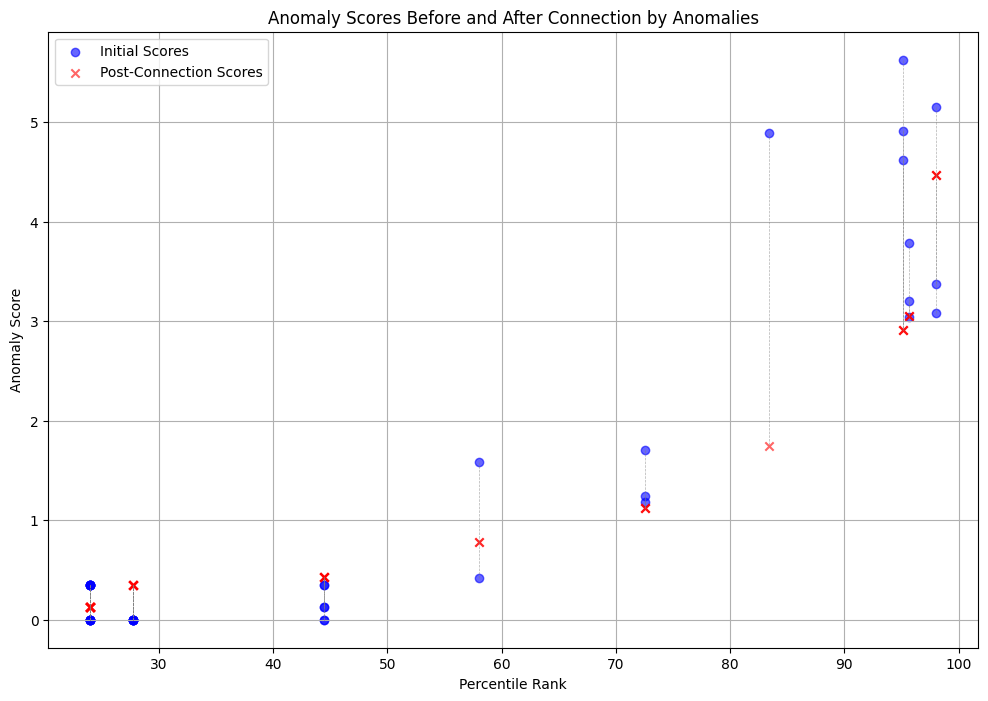

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

print("PRIOR")
print(len(post_connection_anomaly_scores))
for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 0.00000001:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

print("POST")
print(len(post_connection_anomaly_scores))

percentiles = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

[3.5546771120889042, 4.891606917411909, 3.2524065533925723, 5.6265539350925975, 4.359927070979062, 4.914651022993068, 3.1302854969631113, 3.7832787127226855, 2.8421735403866966, 1.5805591330691133, 2.5504370105787464, 1.7101208349790777, 4.14394930521833, 3.2038038765676697, 4.617101578044998, 3.0427848490260048, 1.1051788864572663, 4.621866878032513, 4.175712457200991, 1.2384969474901895, 4.384222544208447, 1.1850202873607092, 5.15067296191313, 5.152333067673652, 0.0005060327554333961, 0.0004307446968146855, 0.0003553643379318431, 0.00027981267739589203, 0.00020402540597224674, 3.3734601254297756, 3.3737504565201566, 0.0002587693571517117, 0.00033885924085851857, 0.0004172253574680181, 0.0004943576823083541, 3.079061508778182, 3.078032539098313, 0.0010845775186120832, 0.0011726496469967986, 0.0012577367703054268, 0.0013405622124221586, 0.0014216890099972767, 0.001501559449362413, 0.0015805236850428242, 0.0016588607767525727, 0.0017367943679981207, 0.0018145045168256044, 0.001892136723

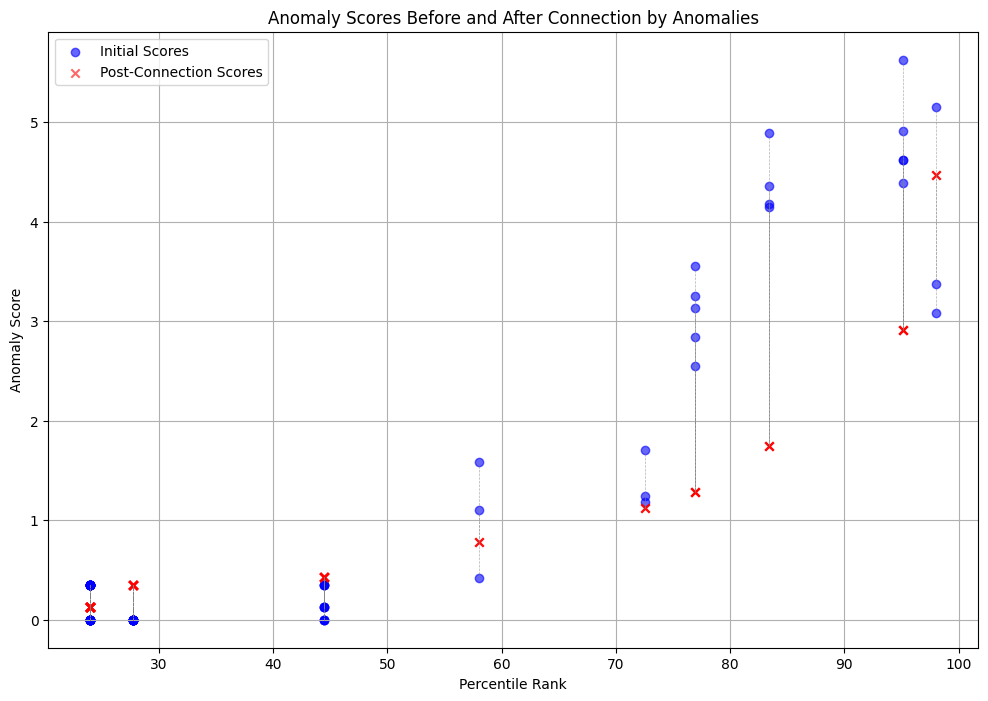

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Calculate percentiles with respect to the entire set of anomaly scores

initial_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy() for tensor in post_connection_anomaly_scores]

initial_anomaly_scores = [tensor[0] for tensor in initial_anomaly_scores]
print(initial_anomaly_scores)
post_connection_anomaly_scores = [tensor[0] for tensor in post_connection_anomaly_scores]

print("PRIOR")
print(len(post_connection_anomaly_scores))
for i, score in enumerate(post_connection_anomaly_scores):
    if score >= 3.0:
        del initial_anomaly_scores[i]
        del post_connection_anomaly_scores[i]

print("POST")
print(len(post_connection_anomaly_scores))

percentiles = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]
print(len(initial_anomaly_scores))
print(len(post_connection_anomaly_scores))

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile': percentiles
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile'][i], data['percentile'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

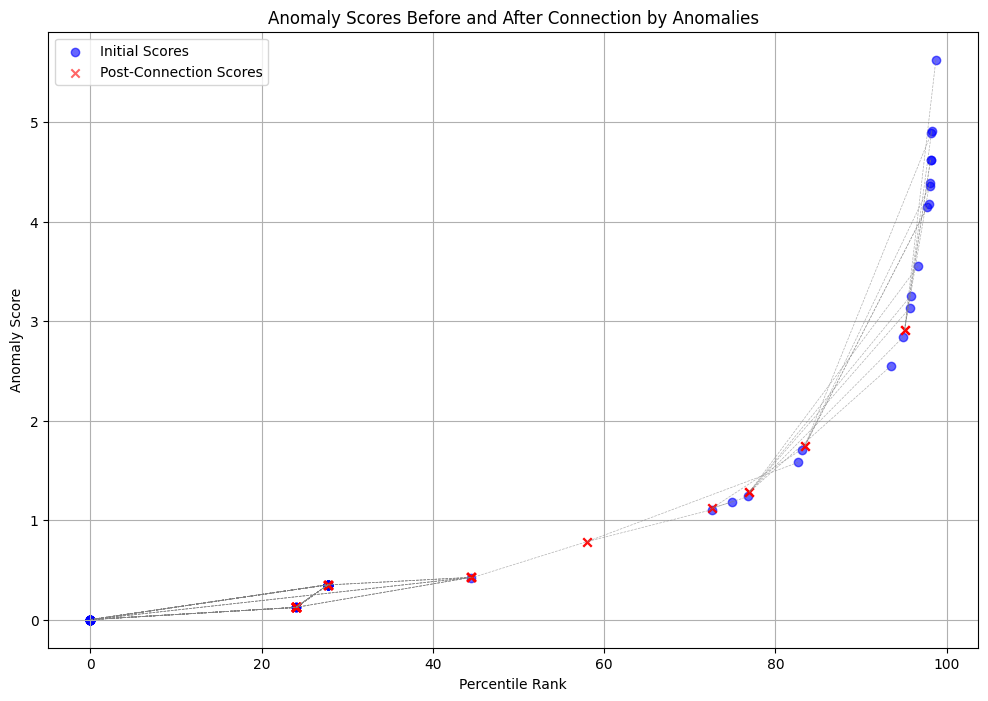

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.0:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

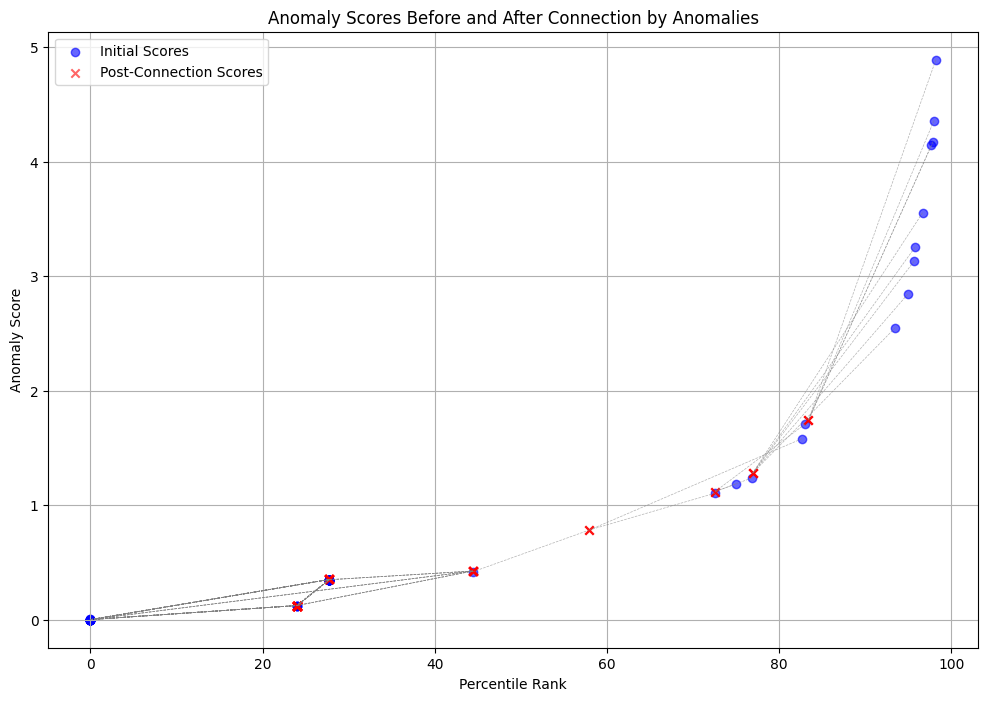

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 2.0:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

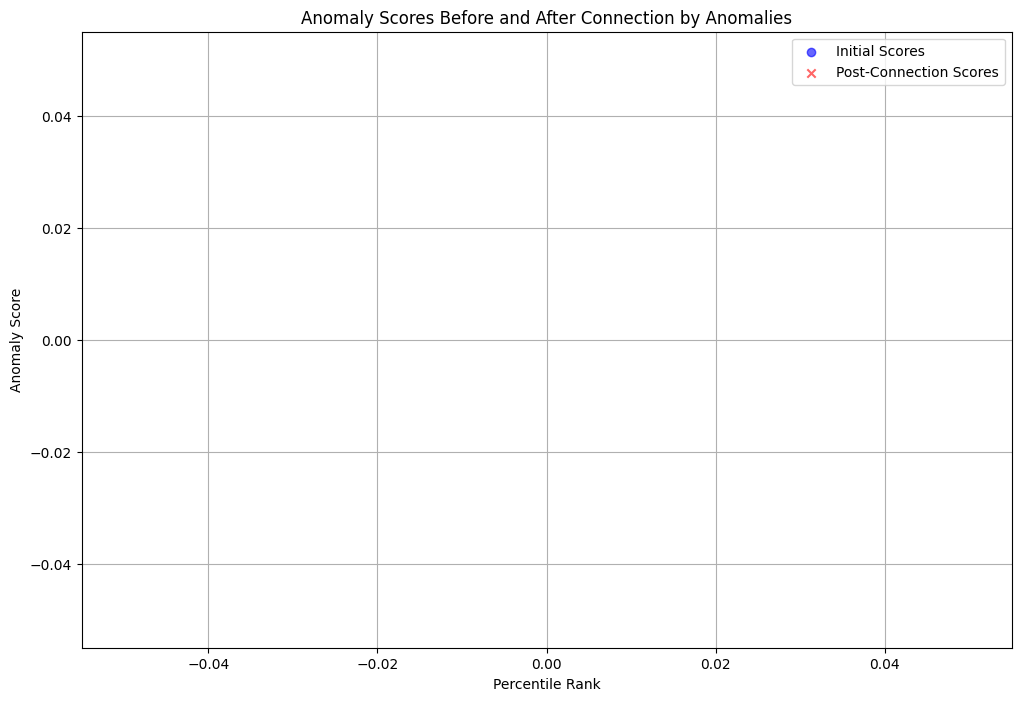

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.001:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

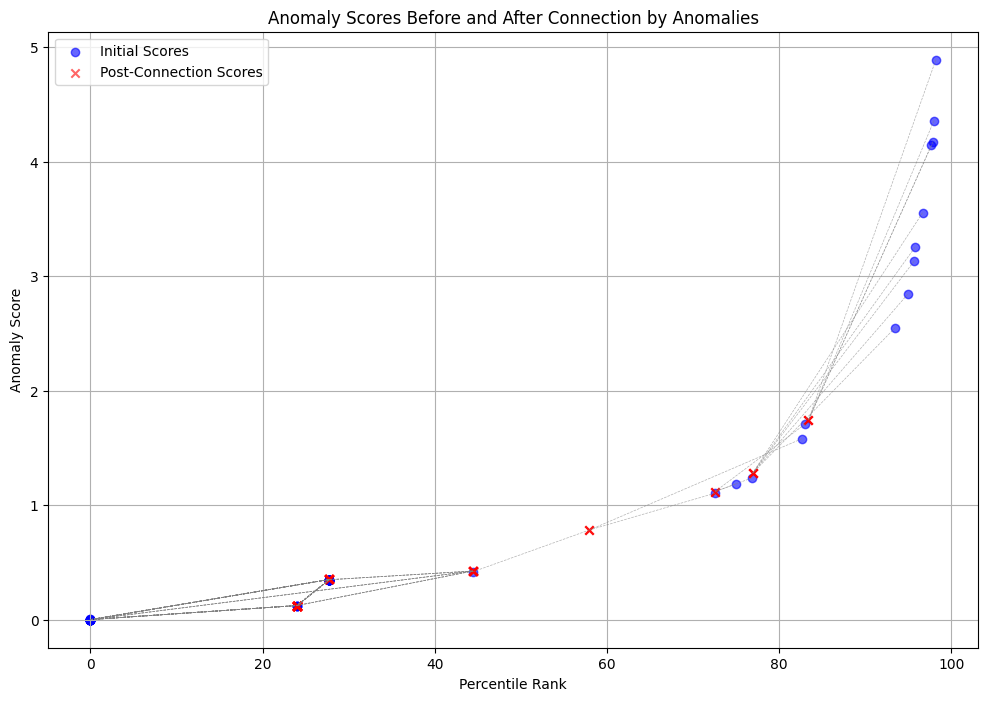

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 2:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

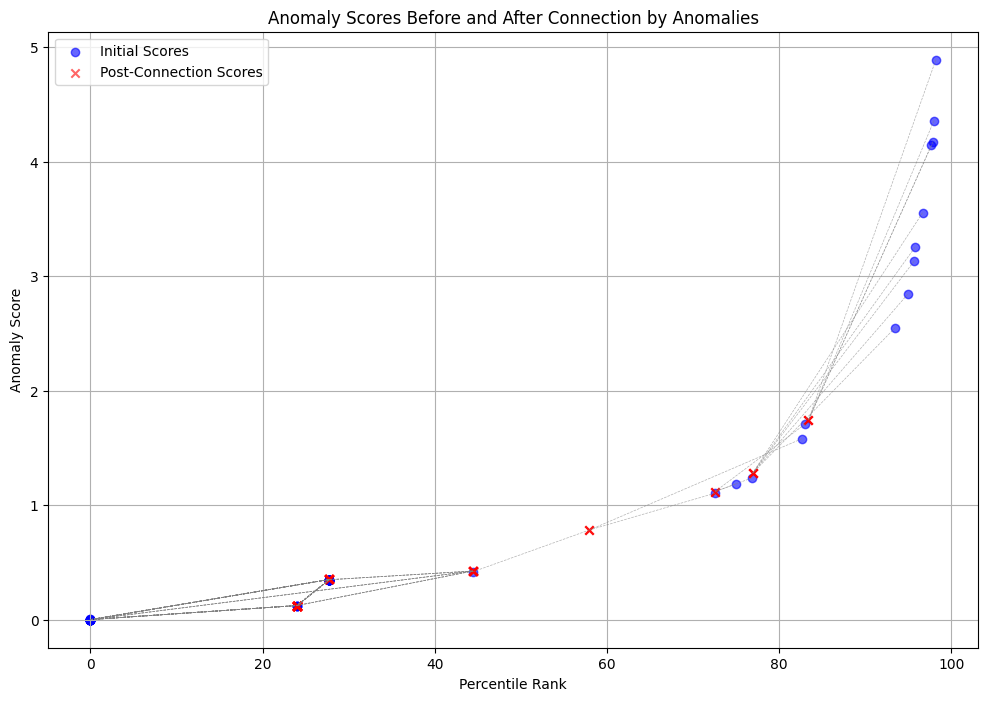

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 2 or initial_anomaly_scores[i] < 2:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

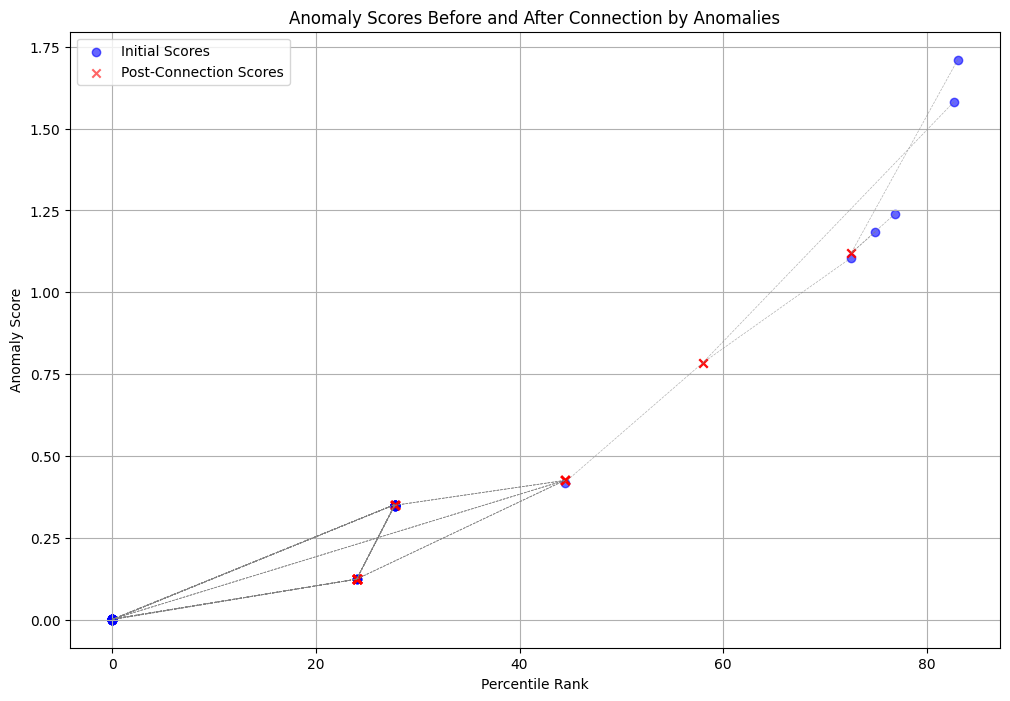

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 2 and initial_anomaly_scores[i] < 2:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

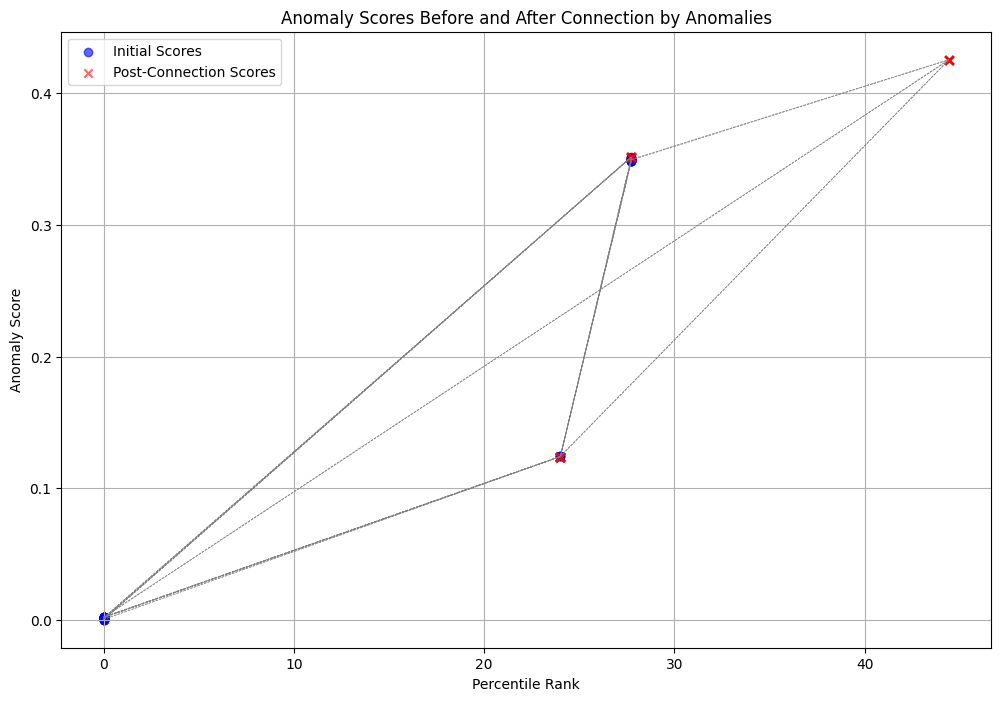

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

c:\Users\andwh\Anaconda3\envs\PyGcuda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


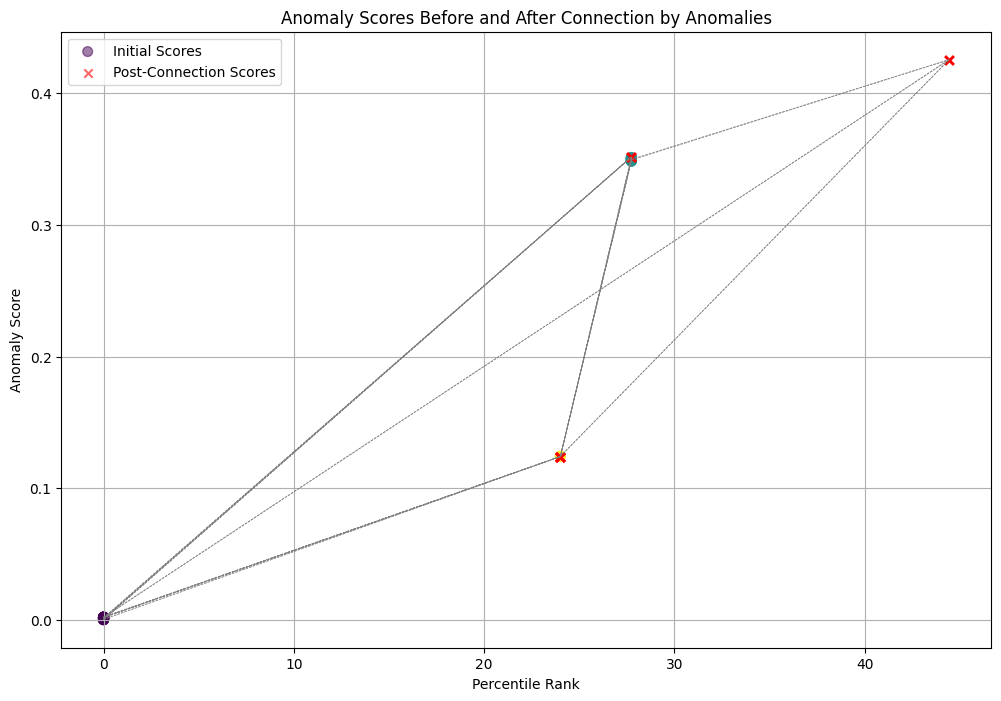

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

from sklearn.cluster import KMeans

# Clustering using KMeans
X = np.column_stack((data['percentile_initial'], data['initial_score']))
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
data['cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], c=data['cluster'], cmap='viridis', s=50, alpha=0.5, label='Initial Scores')

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

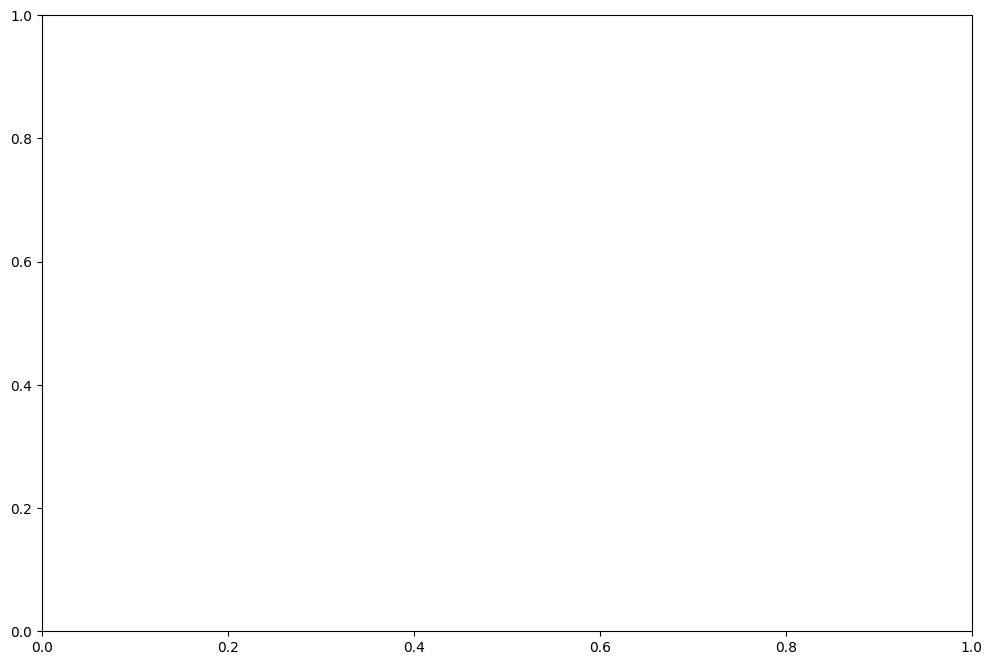

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})
from sklearn.neighbors import KernelDensity

# Calculate kernel density estimation for initial scores
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(np.array(data['percentile_initial']).reshape(-1, 1))
initial_scores_density = np.exp(kde.score_samples(np.linspace(0, 100, 1000).reshape(-1, 1)))

# Normalize the density for marker sizes
min_density, max_density = np.min(initial_scores_density), np.max(initial_scores_density)
sizes = 100 * (initial_scores_density - min_density) / (max_density - min_density)

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores with marker size based on density
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', s=sizes, alpha=0.5)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

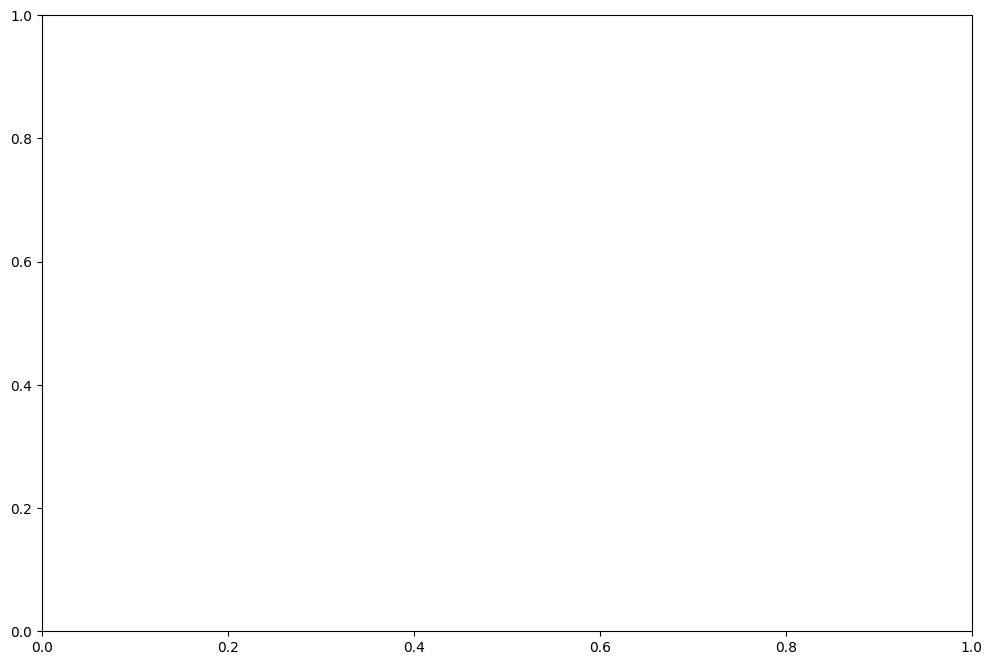

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})
from sklearn.neighbors import KernelDensity

# Calculate kernel density estimation for initial scores
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(np.array(data['percentile_initial']).reshape(-1, 1))
initial_scores_density = np.exp(kde.score_samples(np.linspace(0, 100, 1000).reshape(-1, 1)))

# Normalize the density for marker sizes
min_density, max_density = np.min(initial_scores_density), np.max(initial_scores_density)
sizes = 100 * (initial_scores_density - min_density) / (max_density - min_density)

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores with marker size based on density
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', s=sizes, alpha=0.5)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

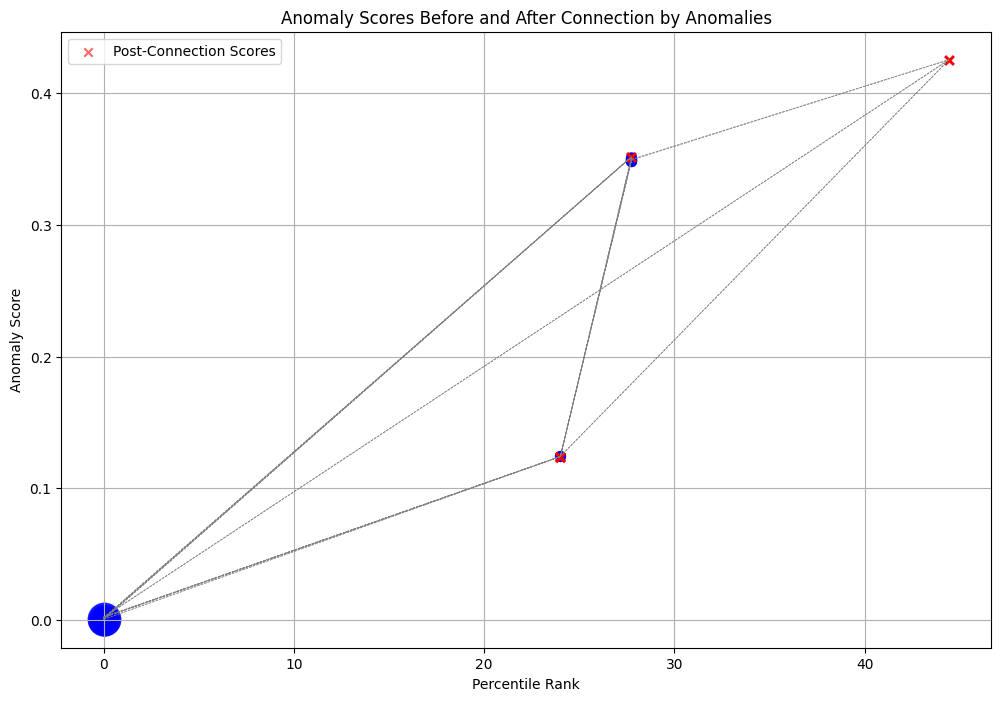

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})
from sklearn.neighbors import KernelDensity

# Calculate kernel density estimation for initial scores
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(np.array(data['percentile_initial']).reshape(-1, 1))
initial_scores_density = np.exp(kde.score_samples(np.linspace(0, 100, 1000).reshape(-1, 1)))

# Normalize the density for marker sizes
min_density, max_density = np.min(initial_scores_density), np.max(initial_scores_density)
sizes = 500 * (initial_scores_density - min_density) / (max_density - min_density) + 50  # Adjust scale and offset

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores with marker size based on density
for i in range(len(data)):
    plt.scatter(data['percentile_initial'][i], data['initial_score'][i], color='blue', alpha=0.5, s=sizes[i])

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = np.interp(initial_anomaly_scores, anomaly_scores_sorted, percentile_values)
percentiles_post = np.interp(post_connection_anomaly_scores, anomaly_scores_sorted, percentile_values)

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

NameError: name 'anomaly_scores_sorted' is not defined

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]


# Generate more granular percentile values
min_score = min(anomaly_scores)
max_score = max(anomaly_scores)
granularity = 1000  # Adjust granularity as needed
percentile_values = np.linspace(0, 100, granularity)
anomaly_scores_sorted = np.sort(anomaly_scores)
# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = np.interp(initial_anomaly_scores, anomaly_scores_sorted, percentile_values)
percentiles_post = np.interp(post_connection_anomaly_scores, anomaly_scores_sorted, percentile_values)

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

ValueError: fp and xp are not of the same length.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]


# Generate more granular percentile values
min_score = min(anomaly_scores)
max_score = max(anomaly_scores)
granularity = 1000  # Adjust granularity as needed
percentile_values = np.linspace(0, 100, granularity)
anomaly_scores_sorted = np.sort(anomaly_scores)
# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Ensure unique values for anomaly scores
anomaly_scores_unique = np.unique(anomaly_scores)

# Generate more granular percentile values
min_score = min(anomaly_scores_unique)
max_score = max(anomaly_scores_unique)
granularity = 1000  # Adjust granularity as needed
percentile_values = np.linspace(0, 100, granularity)

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = np.interp(initial_anomaly_scores, anomaly_scores_unique, percentile_values)
percentiles_post = np.interp(post_connection_anomaly_scores, anomaly_scores_unique, percentile_values)

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

ValueError: fp and xp are not of the same length.

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]



# Ensure unique values for anomaly scores
anomaly_scores_sorted_unique = np.sort(np.unique(anomaly_scores))

# Generate more granular percentile values
min_score = min(anomaly_scores_sorted_unique)
max_score = max(anomaly_scores_sorted_unique)
granularity = 1000  # Adjust granularity as needed
percentile_values = np.linspace(0, 100, granularity)

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = np.interp(initial_anomaly_scores, anomaly_scores_sorted_unique, percentile_values)
percentiles_post = np.interp(post_connection_anomaly_scores, anomaly_scores_sorted_unique, percentile_values)

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

ValueError: fp and xp are not of the same length.

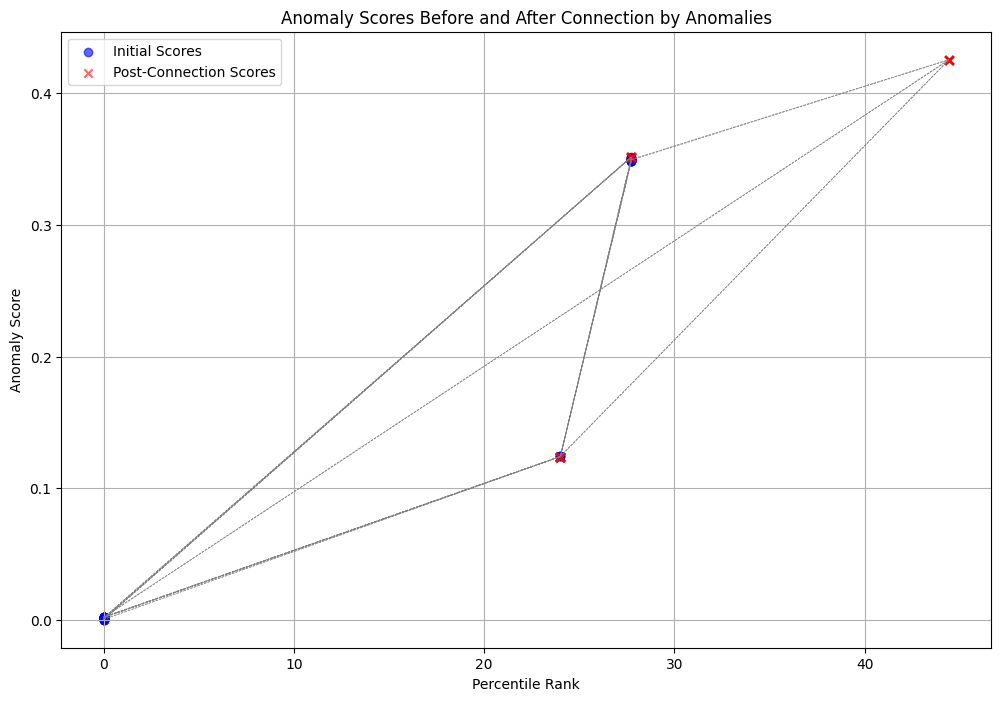

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})


plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

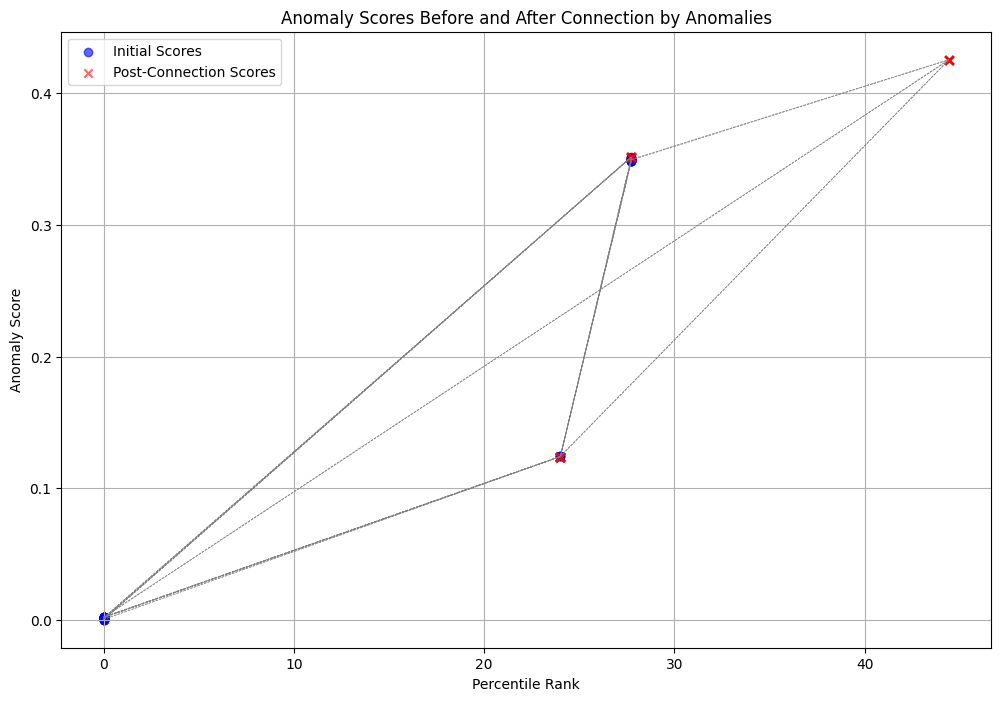

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
bins = 100  # Adjust the number of bins for more granularity
percentiles_initial = [percentileofscore(anomaly_scores, score, kind='weak') for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score, kind='weak') for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})


plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

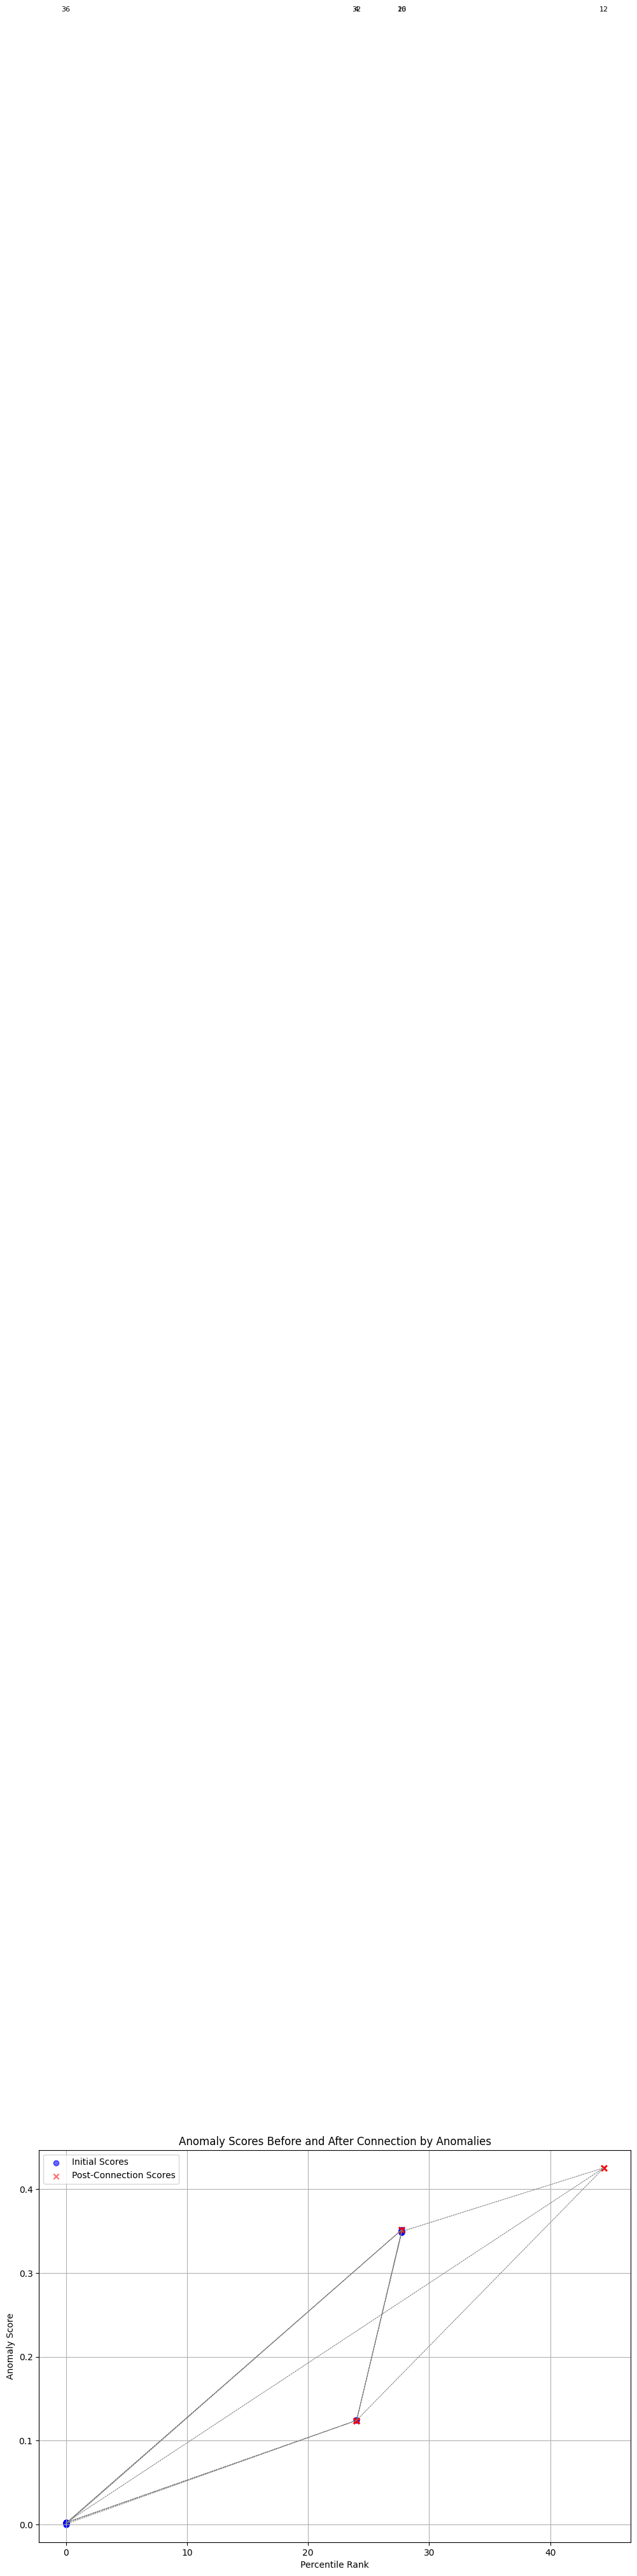

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})


# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column in ['percentile_initial', 'percentile_post']:
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            plt.text(index,  # x-coordinate
                     3.0,      # y-coordinate for text placement (adjust as needed)
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=8, color='black')

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')
plt.legend()
plt.grid(True)

plt.show()

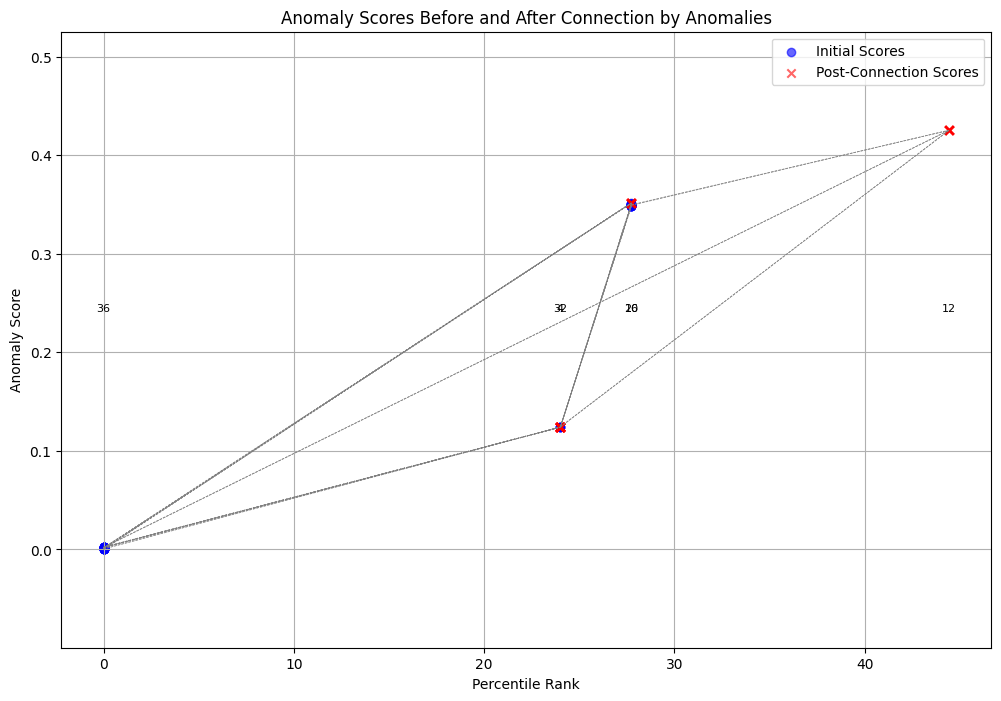

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column in ['percentile_initial', 'percentile_post']:
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            plt.text(index,  # x-coordinate
                     np.mean(data['post_connection_score']),  # y-coordinate for text placement (adjusted to avoid whitespace)
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=8, color='black')

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.1, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.1)

plt.legend()
plt.grid(True)

plt.show()

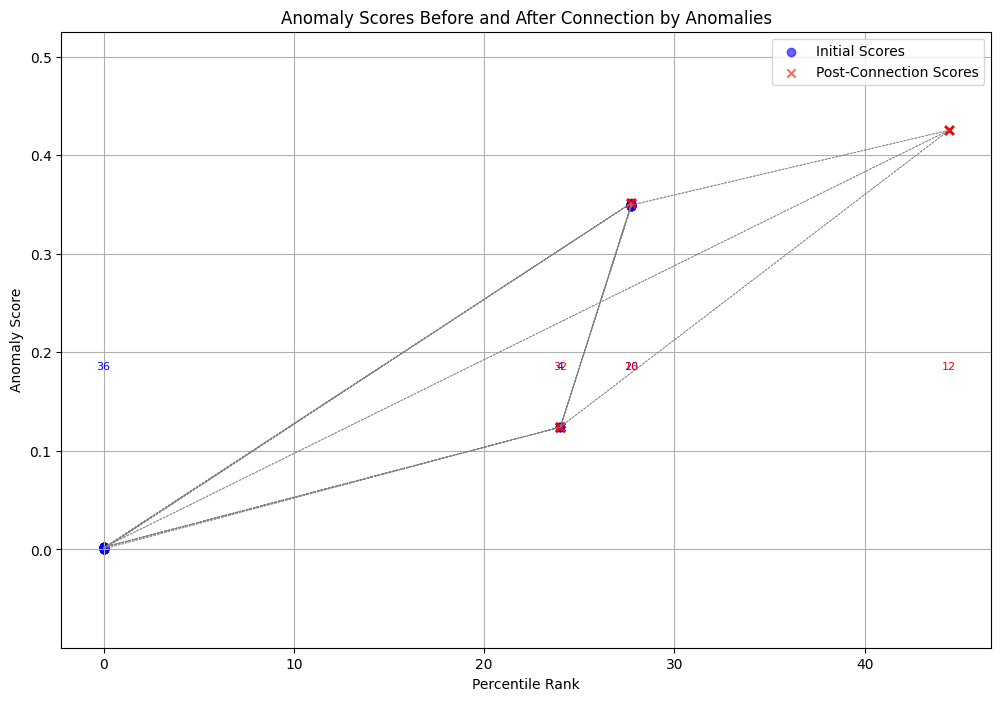

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color in zip(['percentile_initial', 'percentile_post'], ['blue', 'red']):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            plt.text(index,  # x-coordinate
                     np.mean([data['initial_score'], data['post_connection_score']]),  # y-coordinate for text placement (adjusted to avoid whitespace)
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=8, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.1, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.1)

plt.legend()
plt.grid(True)

plt.show()

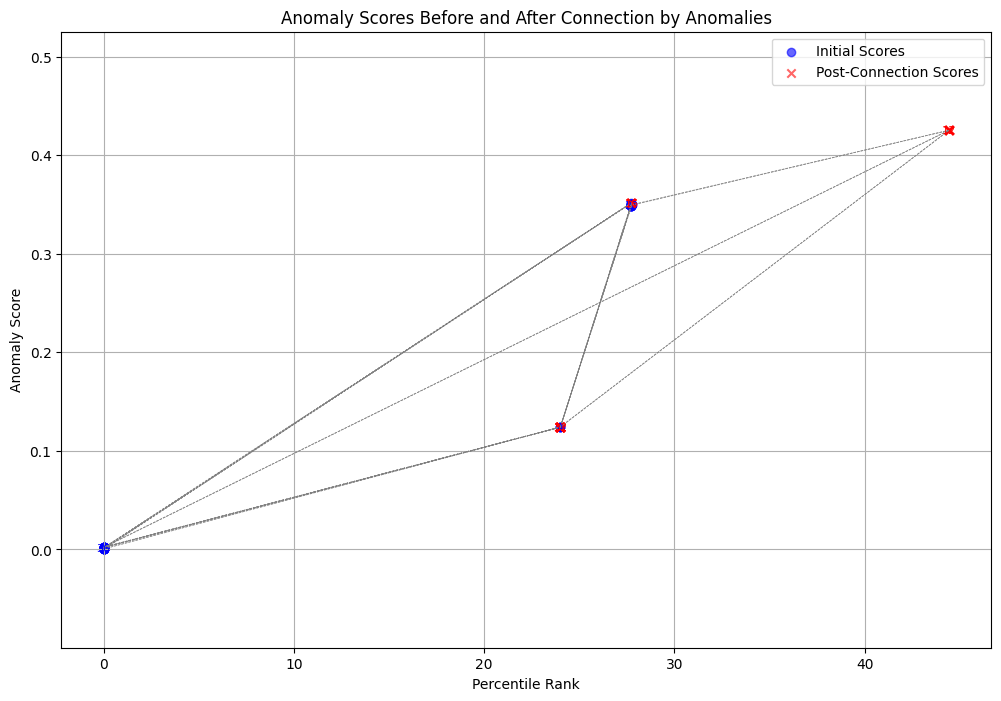

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            plt.text(index,  # x-coordinate
                     y_mean,  # y-coordinate for text placement
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=8, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.1, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.1)

plt.legend()
plt.grid(True)

plt.show()

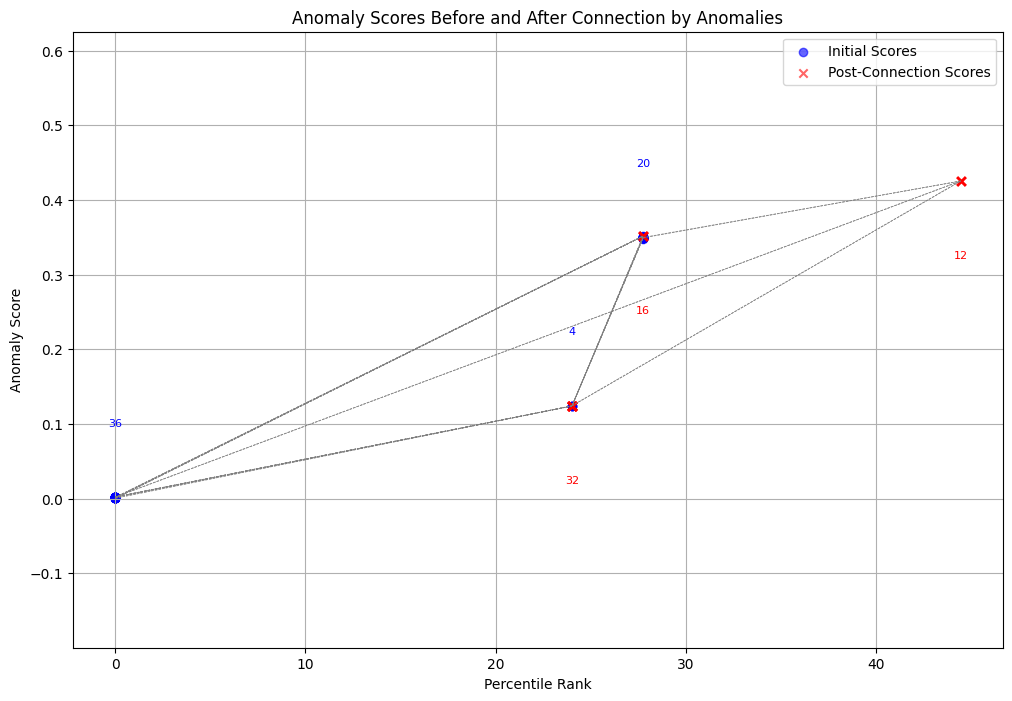

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.1 if color == 'blue' else -0.1
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=8, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

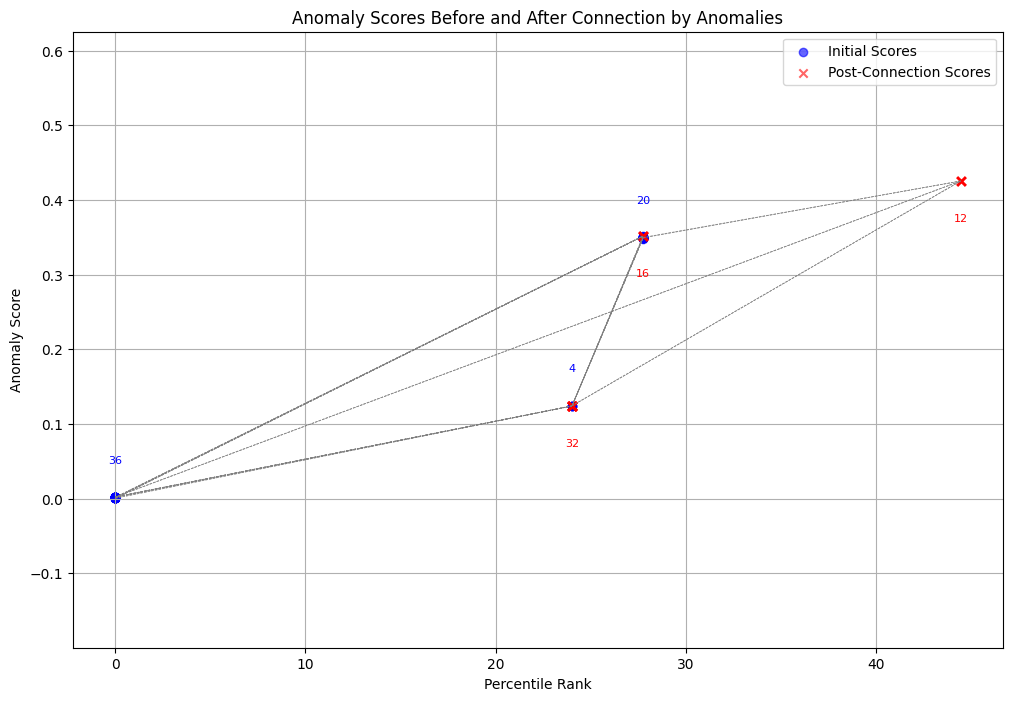

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.05 if color == 'blue' else -0.05
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=8, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

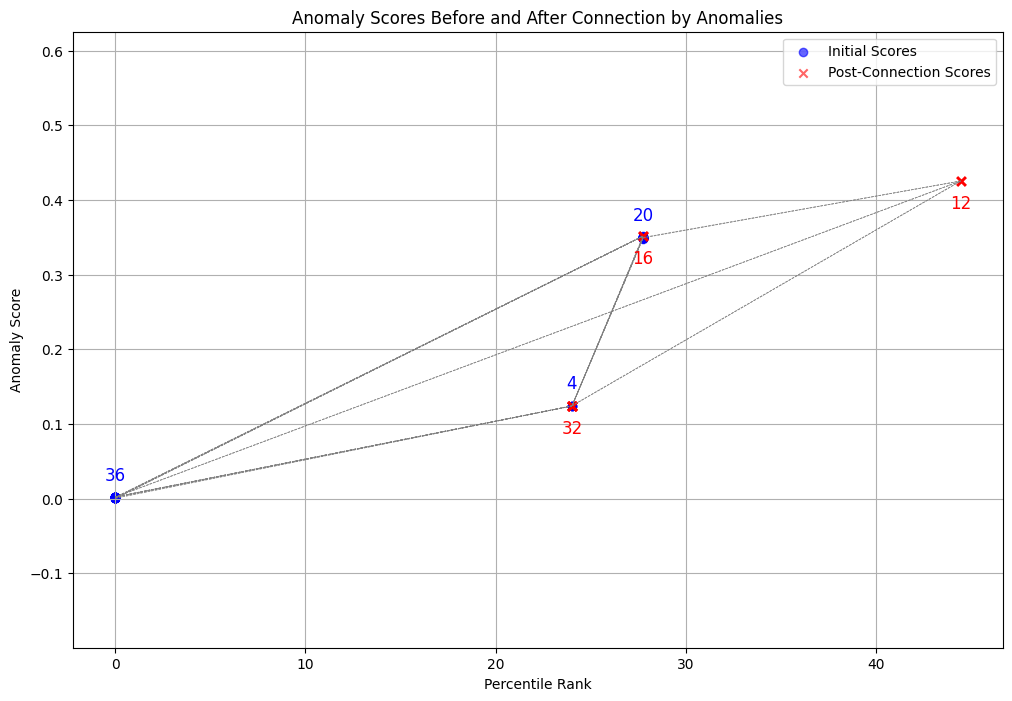

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 0.6 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.03 if color == 'blue' else -0.03
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

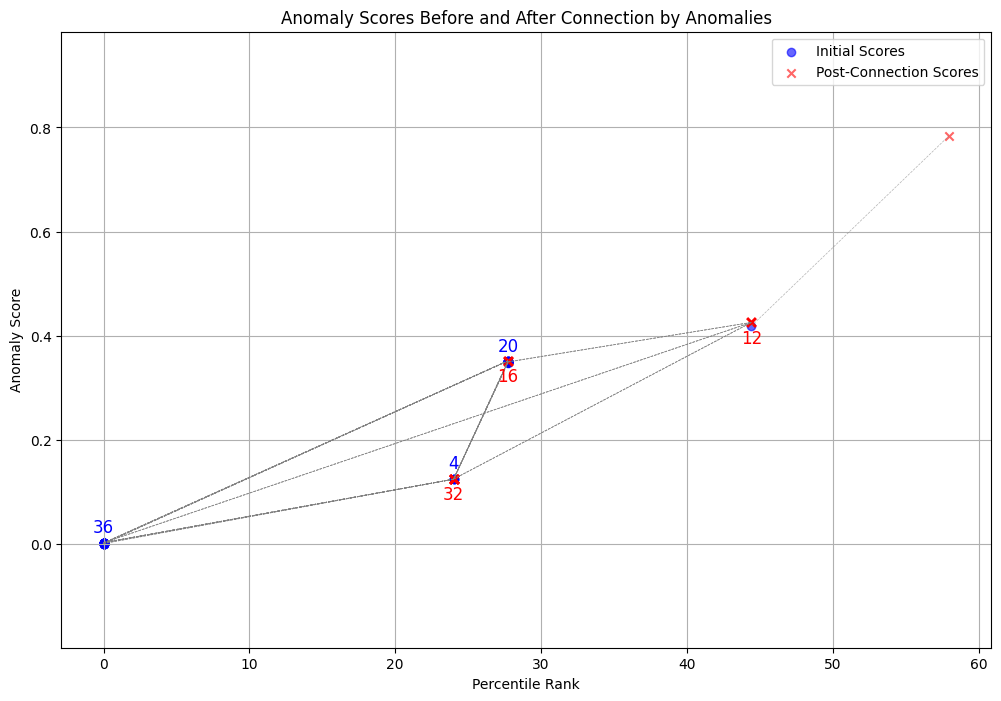

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.3735 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count > 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.03 if color == 'blue' else -0.03
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

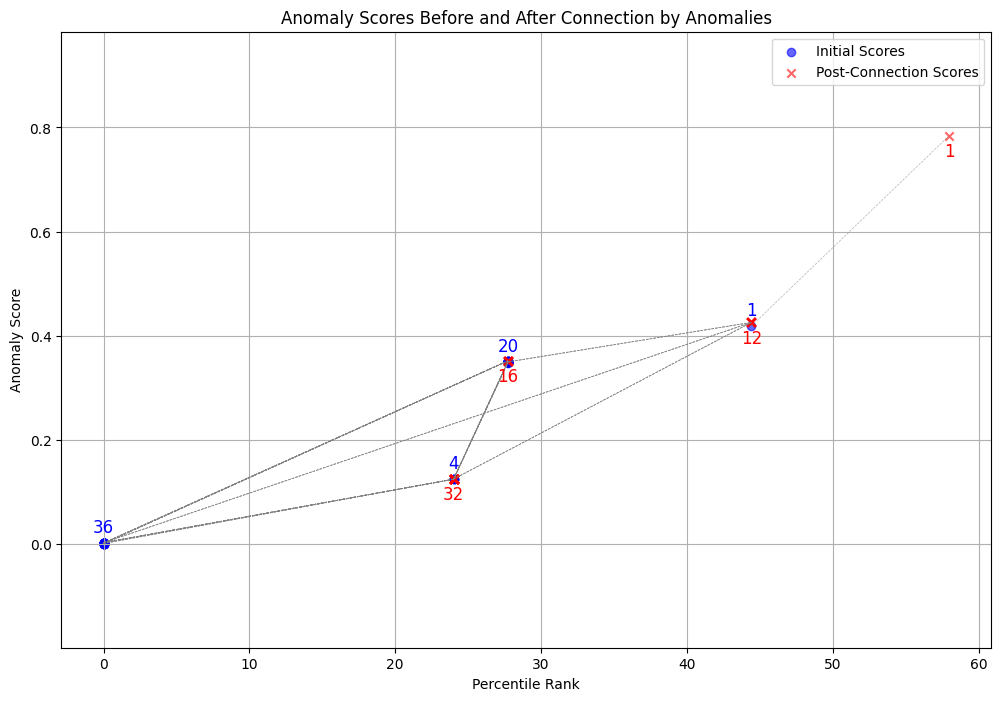

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.3735 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count >= 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.03 if color == 'blue' else -0.03
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

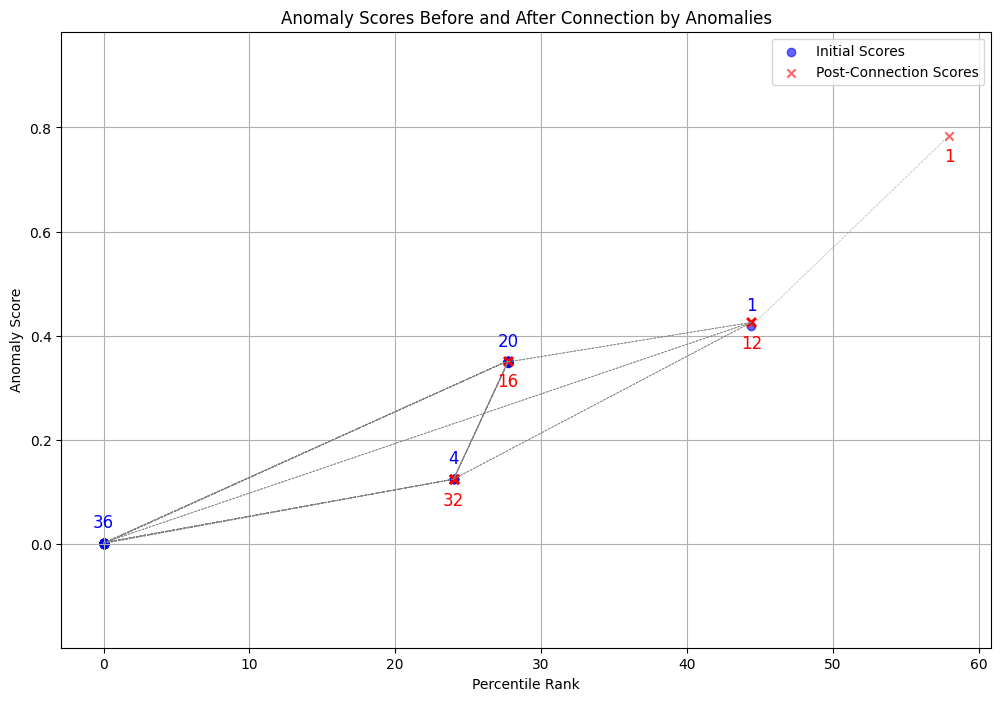

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.3735 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count >= 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.04 if color == 'blue' else -0.04
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

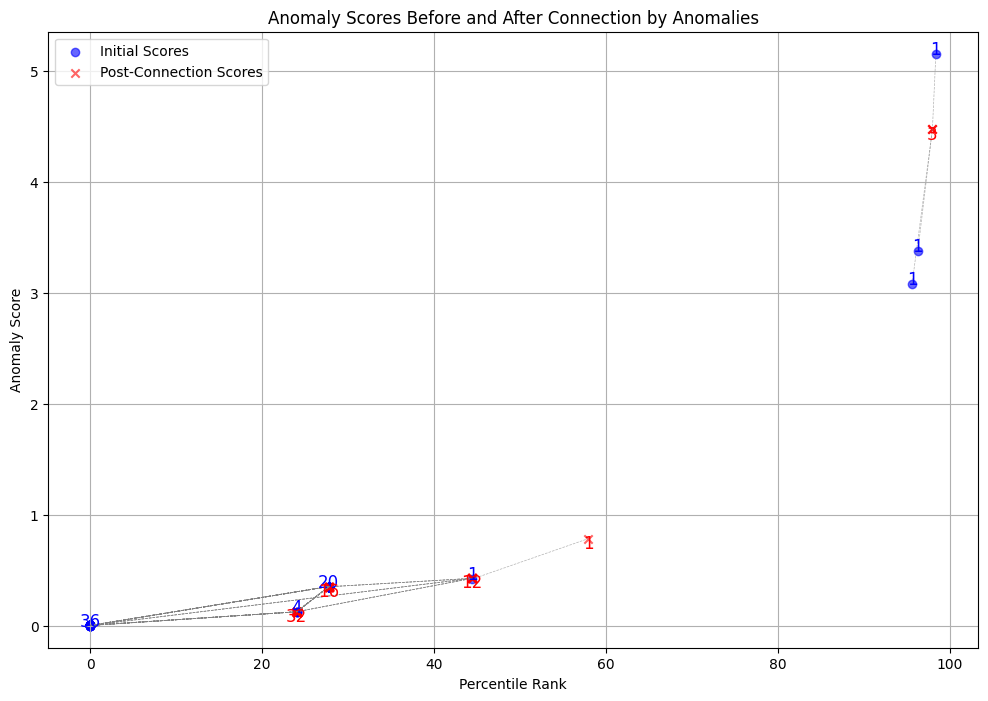

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.3735 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

initial_anomaly_scores.append(5.1523)
initial_anomaly_scores.append(3.3735)
initial_anomaly_scores.append(3.0791)



post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count >= 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.04 if color == 'blue' else -0.04
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

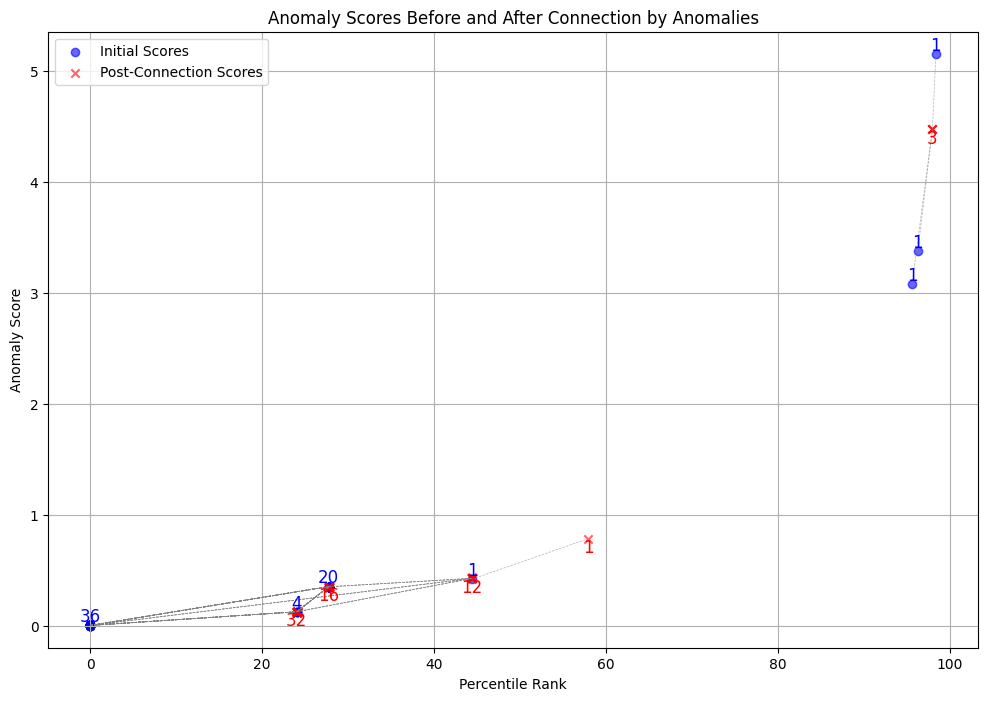

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.3735 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

initial_anomaly_scores.append(5.1523)
initial_anomaly_scores.append(3.3735)
initial_anomaly_scores.append(3.0791)



post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count >= 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.08 if color == 'blue' else -0.08
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

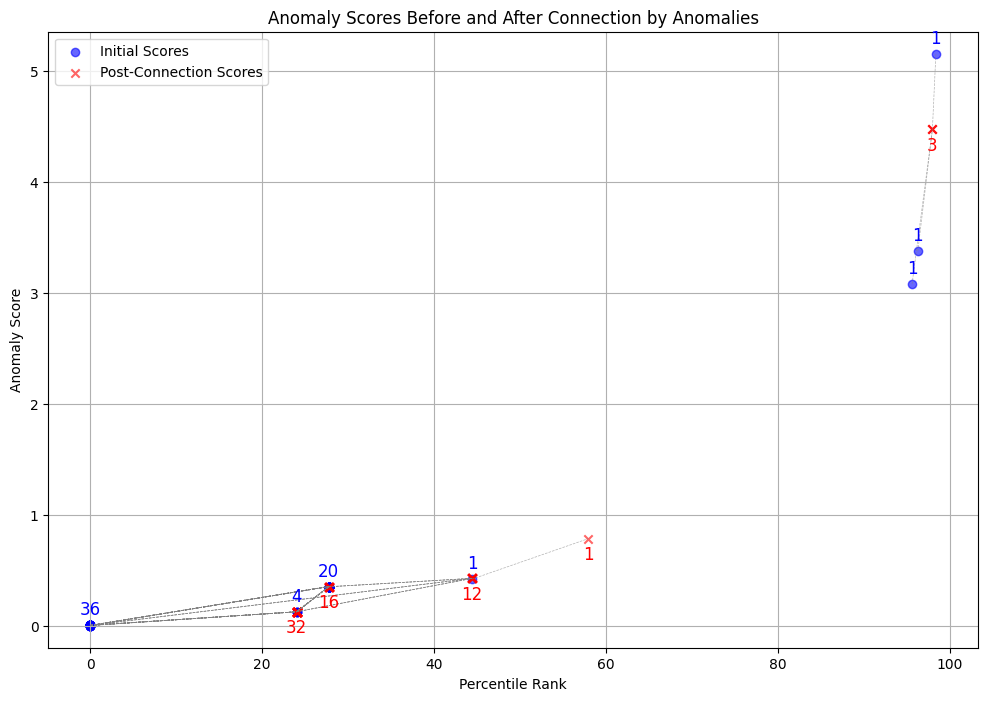

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.3735 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

initial_anomaly_scores.append(5.1523)
initial_anomaly_scores.append(3.3735)
initial_anomaly_scores.append(3.0791)



post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count >= 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.14 if color == 'blue' else -0.14
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()

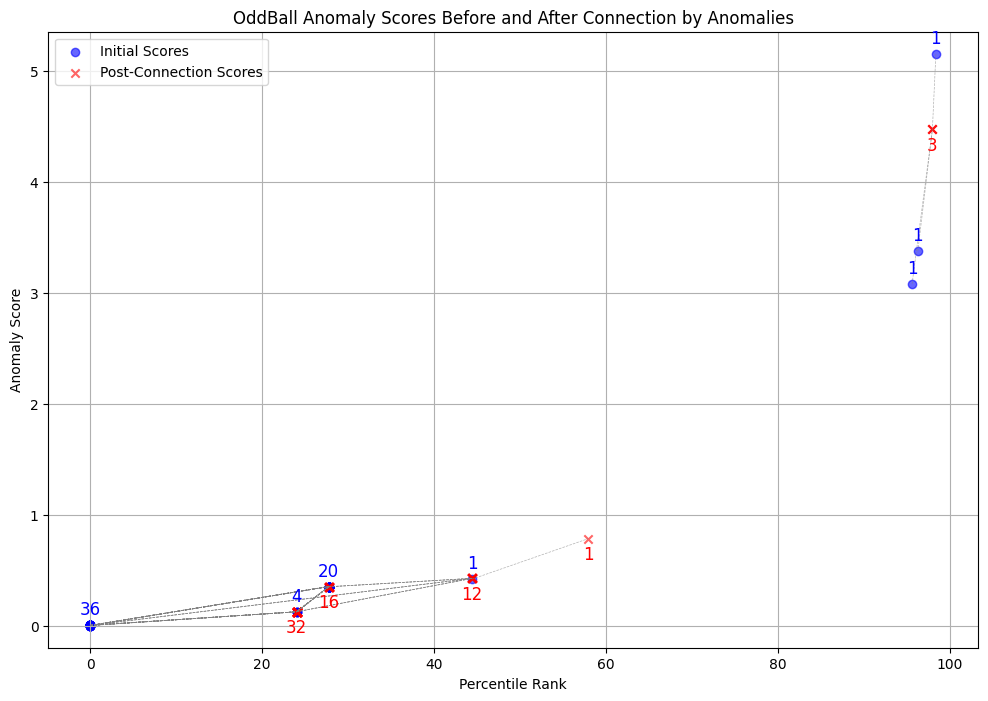

In [ ]:
# %%

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore

# Sample data
np.random.seed(42)  # For reproducibility
anomaly_scores = target_list_as  # Replace with your data for all nodes
initial_anomaly_scores = edge_AS_prior  # Replace with your data for benign nodes before connections
post_connection_anomaly_scores = edge_AS_post

# Convert tensors to numpy arrays and flatten them
initial_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in initial_anomaly_scores]
post_connection_anomaly_scores = [tensor.cpu().detach().numpy()[0] for tensor in post_connection_anomaly_scores]

# Filter out scores >= 3.0
initial_anomaly_scores_filtered = []
post_connection_anomaly_scores_filtered = []
for i, score in enumerate(post_connection_anomaly_scores):
    if score < 3.3735 and initial_anomaly_scores[i] < 0.7840:
        initial_anomaly_scores_filtered.append(initial_anomaly_scores[i])
        post_connection_anomaly_scores_filtered.append(score)

initial_anomaly_scores = initial_anomaly_scores_filtered
post_connection_anomaly_scores = post_connection_anomaly_scores_filtered

initial_anomaly_scores.append(5.1523)
initial_anomaly_scores.append(3.3735)
initial_anomaly_scores.append(3.0791)



post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)
post_connection_anomaly_scores.append(4.4713)

# Calculate percentiles with respect to the entire set of anomaly scores
percentiles_initial = [percentileofscore(anomaly_scores, score) for score in initial_anomaly_scores]
percentiles_post = [percentileofscore(anomaly_scores, score) for score in post_connection_anomaly_scores]

# Prepare DataFrame for easier handling
data = pd.DataFrame({
    'initial_score': initial_anomaly_scores,
    'post_connection_score': post_connection_anomaly_scores,
    'percentile_initial': percentiles_initial,
    'percentile_post': percentiles_post
})

# Plotting
plt.figure(figsize=(12, 8))

# Plot initial scores
initial_scatter = plt.scatter(data['percentile_initial'], data['initial_score'], color='blue', label='Initial Scores', marker='o', alpha=0.6)

# Plot post-connection scores
post_scatter = plt.scatter(data['percentile_post'], data['post_connection_score'], color='red', label='Post-Connection Scores', marker='x', alpha=0.6)

# Connecting lines
for i in range(len(data)):
    plt.plot([data['percentile_initial'][i], data['percentile_post'][i]], 
             [data['initial_score'][i], data['post_connection_score'][i]], 
             color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Add text annotations for overlapping points
for column, color, scatter in zip(['percentile_initial', 'percentile_post'], ['blue', 'red'], [initial_scatter, post_scatter]):
    counts = data[column].value_counts()
    for index, count in counts.items():
        if count >= 1:
            y_mean = np.mean(data.loc[data[column] == index, 'initial_score' if column == 'percentile_initial' else 'post_connection_score'])
            y_offset = 0.14 if color == 'blue' else -0.14
            plt.text(index,  # x-coordinate
                     y_mean + y_offset,  # y-coordinate for text placement with offset
                     f'{count}',  # Text showing the count of overlapping points
                     ha='center', va='center', fontsize=12, color=color)

# Labels and legend
plt.xlabel('Percentile Rank')
plt.ylabel('Anomaly Score')
plt.title('OddBall Anomaly Scores Before and After Connection by Anomalies')

# Set y-axis limits
plt.ylim(bottom=min(min(data['initial_score']), min(data['post_connection_score'])) - 0.2, 
         top=max(max(data['initial_score']), max(data['post_connection_score'])) + 0.2)

plt.legend()
plt.grid(True)

plt.show()